# DATOS DEL JUGADOR 1 PARA EL ACELEROMETRO

In [1]:
#librerias
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import numpy as np
from scipy.signal import detrend
from fastdtw import dtw
import csv
from scipy.ndimage import gaussian_filter
import win32api
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import pywt
from scipy.signal import detrend


In [2]:
# #El proceso puede requerir mas memoria de la que se dispone por lo que se amplia

# # Obtener el límite de uso de memoria virtual actual (en bytes)
# current_limit = win32api.GetProcessMemoryInfo(win32api.GetCurrentProcess())['PagefileUsage']
# print("Límite de uso de memoria virtual actual (en bytes):", current_limit)

# # Establecer un nuevo límite de uso de memoria virtual (en bytes)
# # Por ejemplo, establecer el límite en 20 GB (20 * 1024 * 1024 * 1024 bytes)
# new_limit = 20 * 1024 * 1024 * 1024
# win32api.SetProcessWorkingSetSize(win32api.GetCurrentProcess(), -1, new_limit)

# # Verificar que el límite de uso de memoria virtual se haya actualizado
# current_limit = win32api.GetProcessMemoryInfo(win32api.GetCurrentProcess())['PagefileUsage']
# print("Nuevo límite de uso de memoria virtual (en bytes):", current_limit)


In [2]:
#lectura como dataframe de todos los golpes del jugador 1 del acelerometro
df_dreta = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 1/Entegistraments J1/J1 Dretes ACC.csv')
df_reves = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 1/Entegistraments J1/J1 Reves ACC.csv')
df_serve = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 1/Entegistraments J1/J1 Serve ACC.csv')
df_smash = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 1/Entegistraments J1/J1 Smash ACC.csv')
df_vd = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 1/Entegistraments J1/J1 VD ACC.csv')
df_vr = pd.read_csv('C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/Proves Stroke Count/Jugador 1/Entegistraments J1/J1 VR ACC.csv')


In [3]:
#visualizamos las primeras lineas del dataframe
df_reves.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.135480  0.117635  0.014046  2023-10-20T11:49:01.210487Z   1697802541210
1  0.181733  0.155351  0.018608  2023-10-20T11:49:01.237456Z   1697802541237
2  0.190795  0.162690  0.018527  2023-10-20T11:49:01.254604Z   1697802541254
3  0.160172  0.136115  0.015189  2023-10-20T11:49:01.270980Z   1697802541270
4  0.098053  0.083674  0.009641  2023-10-20T11:49:01.291518Z   1697802541291

In [4]:
df_dreta.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.013325  0.008126  0.000599  2023-10-20T11:45:18.975770Z   1697802318975
1 -0.110110 -0.069654 -0.005859  2023-10-20T11:45:18.996521Z   1697802318996
2 -0.068091 -0.044559 -0.003320  2023-10-20T11:45:19.016312Z   1697802319016
3  0.019304  0.012501  0.000792  2023-10-20T11:45:19.038387Z   1697802319038
4  0.186550  0.116849  0.005761  2023-10-20T11:45:19.056985Z   1697802319056

In [5]:
df_serve.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.004508  0.011801  0.005760  2023-10-20T11:58:23.993768Z   1697803103993
1  0.028438  0.075460  0.035816  2023-10-20T11:58:24.014572Z   1697803104014
2  0.026313  0.070242  0.033340  2023-10-20T11:58:24.035475Z   1697803104035
3  0.000527  0.001434  0.000674  2023-10-20T11:58:24.055277Z   1697803104055
4 -0.008387 -0.024139 -0.011185  2023-10-20T11:58:24.075049Z   1697803104075

In [6]:
df_smash.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.037088  0.196553  0.113550  2023-10-20T11:56:59.008033Z   1697803019008
1  0.043468  0.221967  0.130507  2023-10-20T11:56:59.028194Z   1697803019028
2  0.047113  0.235208  0.138817  2023-10-20T11:56:59.048980Z   1697803019048
3  0.029700  0.150306  0.088492  2023-10-20T11:56:59.069066Z   1697803019069
4  0.022623  0.113196  0.065366  2023-10-20T11:56:59.089291Z   1697803019089

In [7]:
df_vd.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.148587  0.124212  0.003968  2023-10-20T11:52:50.590209Z   1697802770590
1  0.198771  0.166821  0.004786  2023-10-20T11:52:50.610754Z   1697802770610
2  0.194519  0.161000  0.005143  2023-10-20T11:52:50.630835Z   1697802770630
3  0.129344  0.108072  0.004757  2023-10-20T11:52:50.651788Z   1697802770651
4  0.072299  0.061513  0.003251  2023-10-20T11:52:50.670987Z   1697802770670

In [8]:
df_vr.head()

ACC_X     ACC_Y     ACC_Z                         DATE  UNIX_TIMESTAMP
0  0.010237  0.032320  0.018939  2023-10-20T11:53:52.743698Z   1697802832743
1  0.020063  0.063343  0.037714  2023-10-20T11:53:52.764590Z   1697802832764
2  0.043980  0.136765  0.079353  2023-10-20T11:53:52.784383Z   1697802832784
3  0.057111  0.178370  0.100688  2023-10-20T11:53:52.804511Z   1697802832804
4  0.091711  0.261749  0.141962  2023-10-20T11:53:52.824841Z   1697802832824

In [9]:
#eliminamos la columna Date de todos los df ya que solo usaremos el Unixtimestamp
df_dreta = df_dreta.drop(columns=['DATE'])
df_reves = df_reves.drop(columns=['DATE'])
df_serve = df_serve.drop(columns=['DATE'])
df_smash = df_smash.drop(columns=['DATE'])
df_vd = df_vd.drop(columns=['DATE'])
df_vr = df_vr.drop(columns=['DATE'])

In [10]:
#vemos efectivamente que la columna se ha eliminado
df_dreta.head()

ACC_X     ACC_Y     ACC_Z  UNIX_TIMESTAMP
0  0.013325  0.008126  0.000599   1697802318975
1 -0.110110 -0.069654 -0.005859   1697802318996
2 -0.068091 -0.044559 -0.003320   1697802319016
3  0.019304  0.012501  0.000792   1697802319038
4  0.186550  0.116849  0.005761   1697802319056

In [11]:
#busqueda NAs y Nulos

In [12]:
# Convertir el diccionario a un DataFrame
df = pd.DataFrame(df_dreta)

# Buscar NaNs
nan_count = df.isna().sum()

# Buscar ceros
zero_count = (df == 0).sum()

# Mostrar resultados
print("Conteo de valores NaN por columna:")
print(nan_count)
print("\nConteo de ceros por columna:")
print(zero_count)

Conteo de valores NaN por columna:
ACC_X             0
ACC_Y             0
ACC_Z             0
UNIX_TIMESTAMP    0
dtype: int64

Conteo de ceros por columna:
ACC_X             0
ACC_Y             0
ACC_Z             0
UNIX_TIMESTAMP    0
dtype: int64


In [13]:
#Outliers

In [14]:

# Convertir el diccionario a un DataFrame
df = pd.DataFrame(df_dreta)

# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Detectar outliers en cada columna
outliers_acc_z = detect_outliers_iqr(df['ACC_Z'])

# Mostrar resultados
print("Outliers en ACC_Z:")
print(outliers_acc_z)
print(len(outliers_acc_z))


Outliers en ACC_Z:
310    -4.641230
311    -4.863273
312    -5.037326
313    -5.149702
314    -5.194325
          ...   
3675   -7.909490
3676   -7.310993
3677   -6.651877
3678   -5.954801
3679   -5.240586
Name: ACC_Z, Length: 582, dtype: float64
582


In [15]:
# Detectar outliers en cada columna
outliers_acc_y = detect_outliers_iqr(df['ACC_Y'])

# Mostrar resultados
print("Outliers en ACC_Y:")
print(outliers_acc_y)
print(len(outliers_acc_y))


Outliers en ACC_Y:
306     2.096639
307     2.364437
308     2.636020
309     2.904196
310     3.156384
          ...   
3682    4.404615
3683    3.858449
3684    3.288571
3685    2.716643
3686    2.146255
Name: ACC_Y, Length: 786, dtype: float64
786


In [16]:
# Detectar outliers en cada columna
outliers_acc_x = detect_outliers_iqr(df['ACC_X'])

# Mostrar resultados
print("Outliers en ACC_X:")
print(outliers_acc_x)
print(len(outliers_acc_x))


Outliers en ACC_X:
1586    3.908496
1587    3.941320
1588    3.889641
1709    4.086325
1710    4.348036
1711    4.528731
1712    4.633418
1713    4.640503
1714    4.527305
1715    4.307173
1716    4.010447
Name: ACC_X, dtype: float64
11


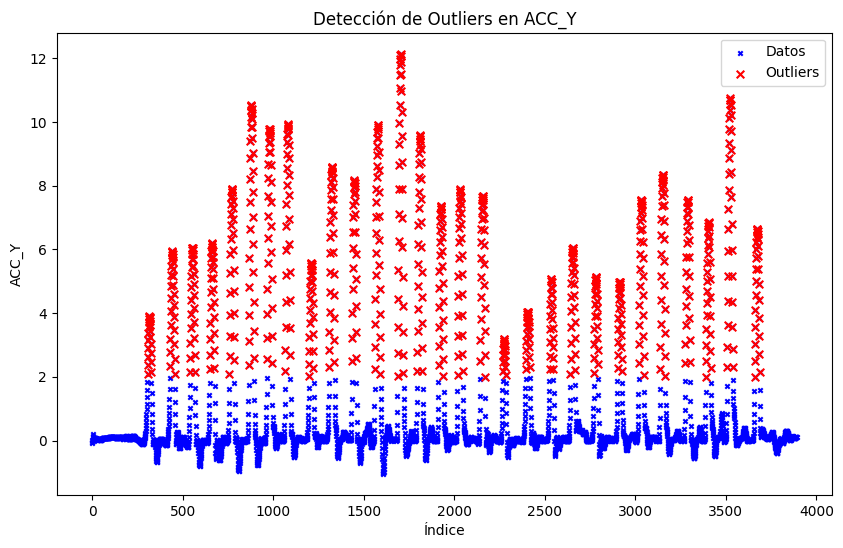

In [17]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_Y'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_y.index, outliers_acc_y, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_Y')
plt.title('Detección de Outliers en ACC_Y')
plt.legend()
plt.show()

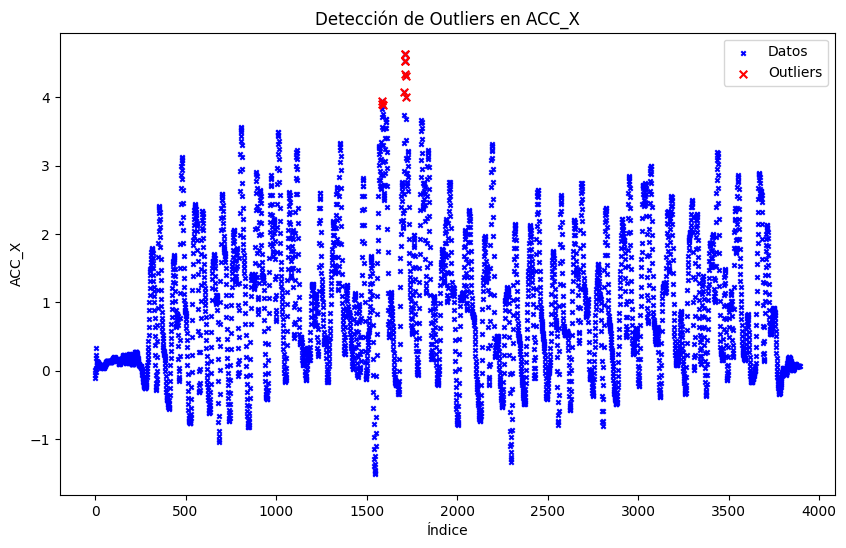

In [18]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_X'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_x.index, outliers_acc_x, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_X')
plt.title('Detección de Outliers en ACC_X')
plt.legend()
plt.show()

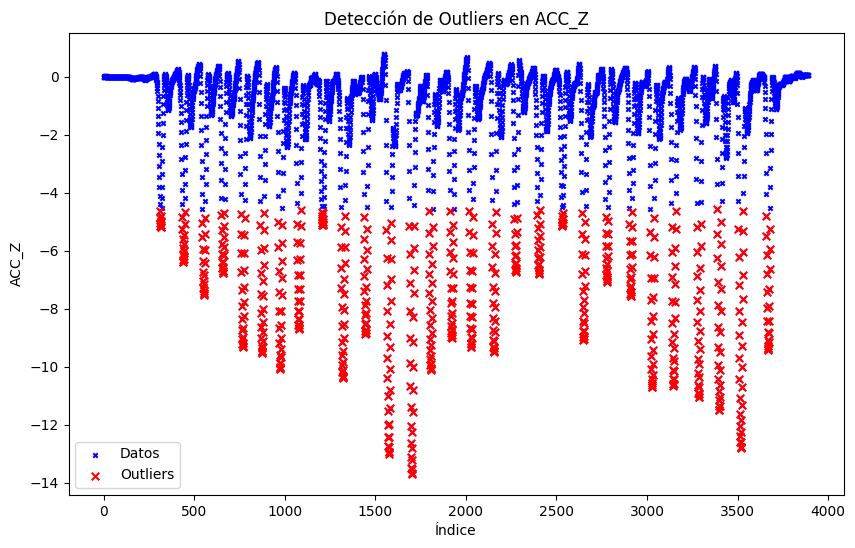

In [19]:

# Graficar los puntos y resaltar los outliers con cruces pequeñas
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['ACC_Z'], label='Datos', color='blue', s=10, marker='x')
plt.scatter(outliers_acc_z.index, outliers_acc_z, label='Outliers', color='red', s=30, marker='x')
plt.xlabel('Índice')
plt.ylabel('ACC_Z')
plt.title('Detección de Outliers en ACC_Z')
plt.legend()
plt.show()

In [20]:

# Definir el tipo de dato para cada columna
dtype = [('ACC_X', float), ('ACC_Y', float), ('ACC_Z', float), ('UNIX_TIMESTAMP', int)]

# Convertir el DataFrame a un array NumPy con tipos de datos específicos
array_dreta = np.array(df_dreta.to_records(index=False), dtype=dtype)

array_reves = np.array(df_reves.to_records(index=False), dtype=dtype)

array_serve = np.array(df_serve.to_records(index=False), dtype=dtype)

array_smash = np.array(df_smash.to_records(index=False), dtype=dtype)

array_vd = np.array(df_vd.to_records(index=False), dtype=dtype)

array_vr = np.array(df_vr.to_records(index=False), dtype=dtype)



In [21]:
array_vr['UNIX_TIMESTAMP']

array([1290750823, 1290750844, 1290750864, ..., 1290803268, 1290803286,
       1290803306])

In [22]:
#GRAFICAMOS TODOS LOS EJES PARA TENER UNA PRIMERA VISUALIZACION

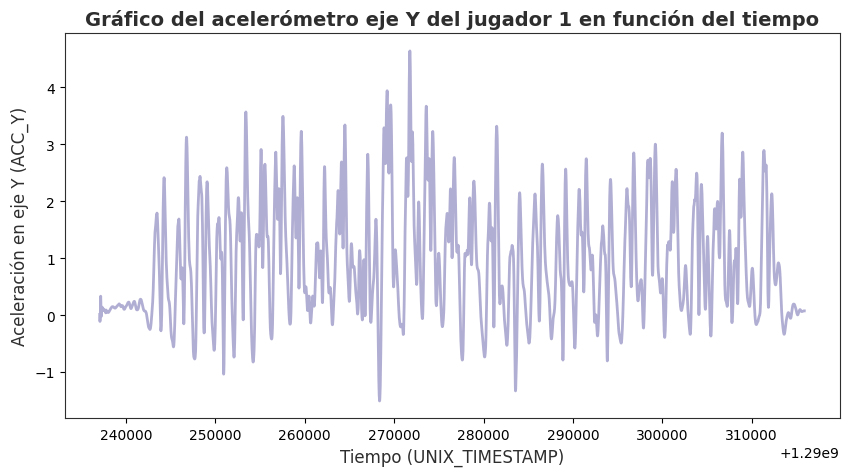

In [23]:

# Extraer los datos
acc_x = array_dreta['ACC_X']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_x, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Y del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Y (ACC_Y)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

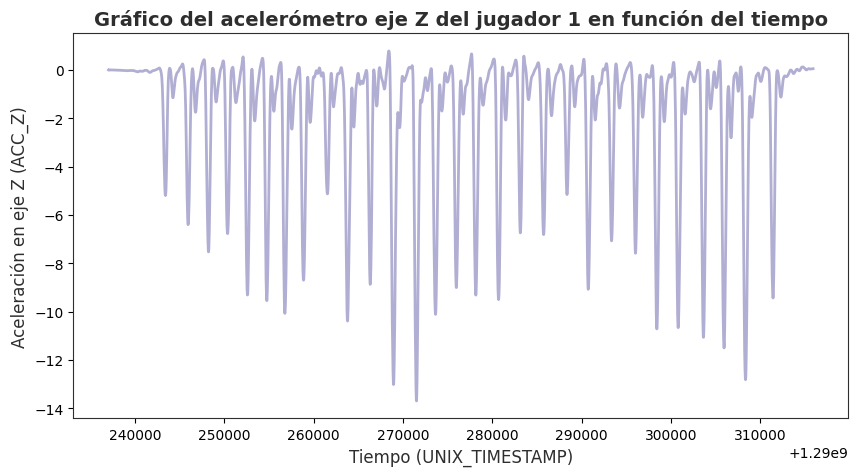

In [24]:
# Extraer los datos
acc_z = array_dreta['ACC_Z']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_z, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Z del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Z (ACC_Z)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

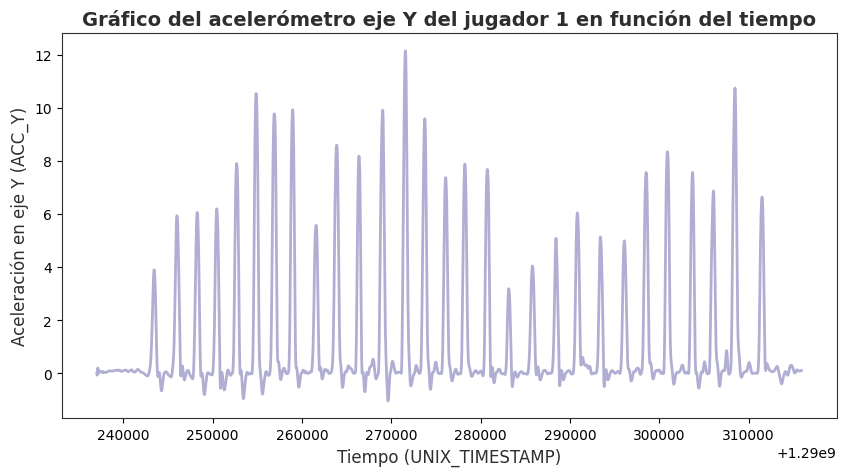

In [25]:
# Extraer los datos
acc_y = array_dreta['ACC_Y']
unix_timestamp = array_dreta['UNIX_TIMESTAMP']

# Crear el gráfico
plt.figure(figsize=(10, 5))

# Personalizar el gráfico con una línea de tendencia
plt.plot(unix_timestamp, acc_y, linestyle='-', linewidth=2, color='#9e9ac8', alpha=0.8)

# Agregar título y etiquetas
plt.title('Gráfico del acelerómetro eje Y del jugador 1 en función del tiempo', fontsize=14, fontweight='bold', color='#2e2e2e')
plt.xlabel('Tiempo (UNIX_TIMESTAMP)', fontsize=12, color='#2e2e2e')
plt.ylabel('Aceleración en eje Y (ACC_Y)', fontsize=12, color='#2e2e2e')

# Cambiar el color de los ejes
plt.gca().spines['bottom'].set_color('#2e2e2e')
plt.gca().spines['top'].set_color('#2e2e2e')
plt.gca().spines['left'].set_color('#2e2e2e')
plt.gca().spines['right'].set_color('#2e2e2e')

# Ocultar la cuadrícula de fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()

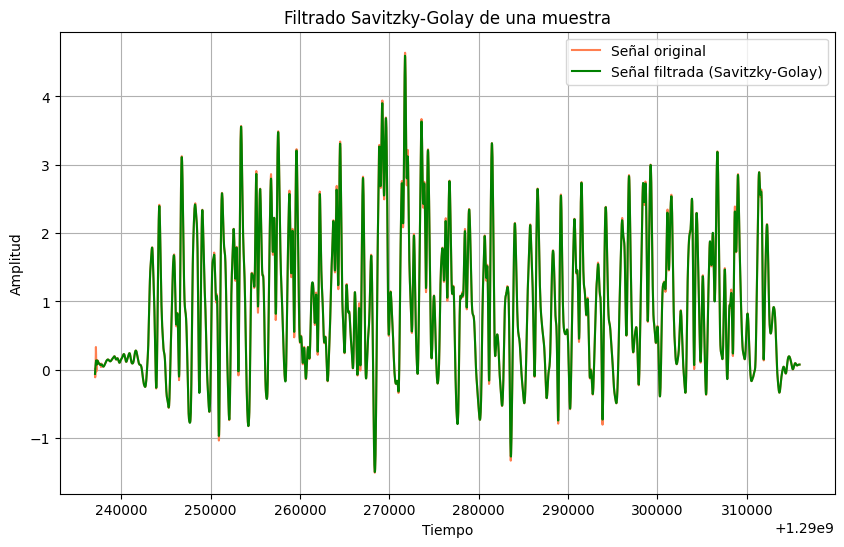

In [26]:


# Aplicar el filtrado Savitzky-Golay a la segunda columna de la muestra
filtered_signal_savgol = savgol_filter(acc_x, window_length=13, polyorder=2)

# Graficar la señal original y la señal filtrada con Savitzky-Golay
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_savgol, label='Señal filtrada (Savitzky-Golay)',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Savitzky-Golay de una muestra')
plt.legend()
plt.grid(True)
plt.show()


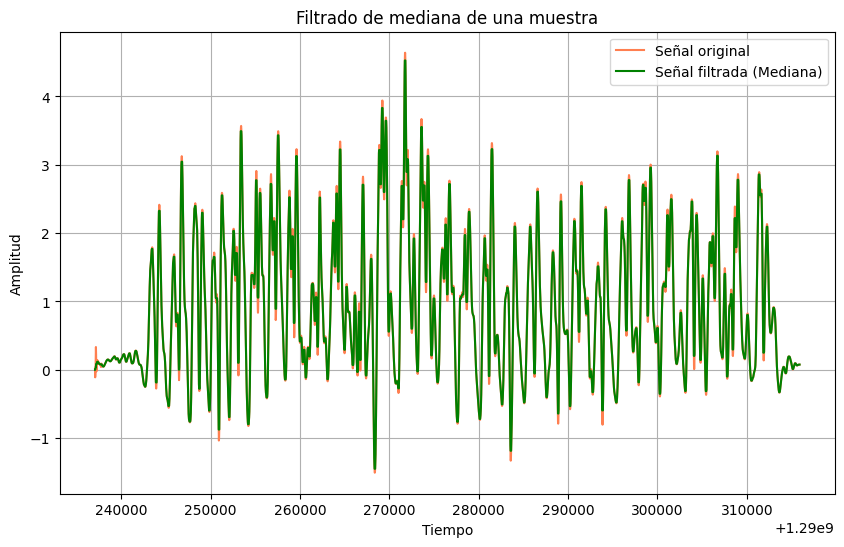

In [27]:

# Aplicar el filtrado de mediana a la segunda columna de la muestra
filtered_signal_medfilt = medfilt(acc_x, kernel_size=7)  # El tamaño del kernel debe ser impar

# Graficar la señal original y la señal filtrada con mediana
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_medfilt, label='Señal filtrada (Mediana)',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado de mediana de una muestra')
plt.legend()
plt.grid(True)
plt.show()


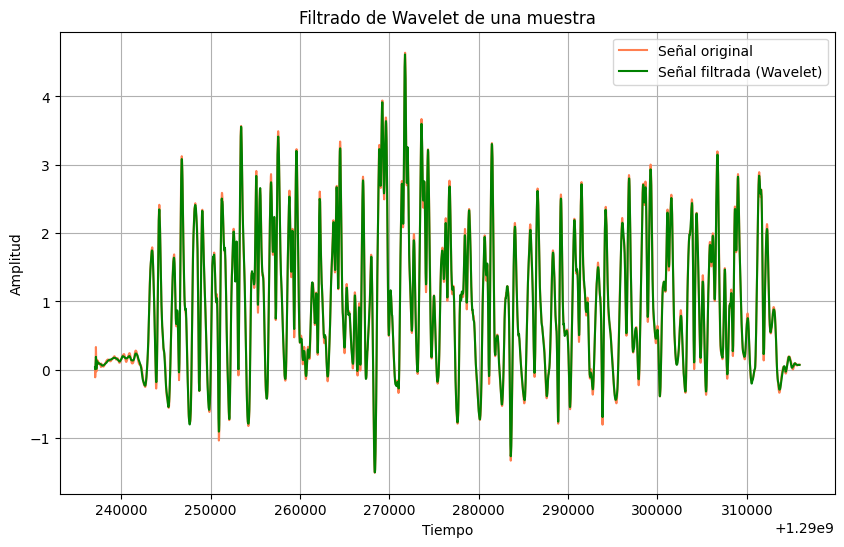

In [28]:

# Definir el nivel de descomposición y la wavelet a utilizar
level = 5
wavelet = 'db4'

# Aplicar wavelet denoising a la segunda columna de la muestra
coeffs = pywt.wavedec(acc_x, wavelet, level=level)
coeffs[1:] = (pywt.threshold(detail, value=0.1, mode='soft') for detail in coeffs[1:])
filtered_signal_wavelet = pywt.waverec(coeffs, wavelet)

# Graficar la señal original y la señal filtrada con wavelet denoising
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, filtered_signal_wavelet, label='Señal filtrada (Wavelet)',  color='green' )
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado de Wavelet de una muestra')
plt.legend()
plt.grid(True)
plt.show()


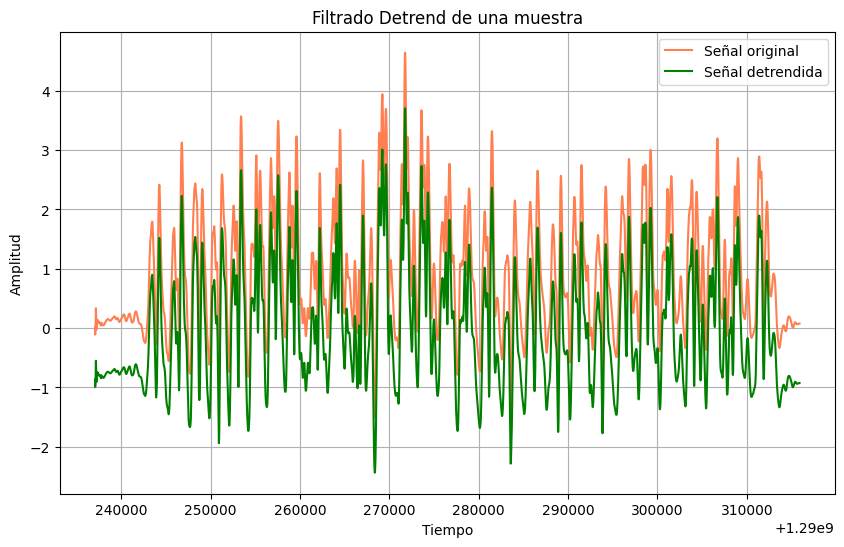

In [29]:
# Aplicar el filtrado detrend a la señal
detrended_signal = detrend(acc_x)

# Graficar la señal original y la señal detrendida
plt.figure(figsize=(10, 6))
plt.plot(unix_timestamp, acc_x, label='Señal original',  color='coral')
plt.plot(unix_timestamp, detrended_signal, label='Señal detrendida',  color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Detrend de una muestra')
plt.legend()
plt.grid(True)
plt.show()

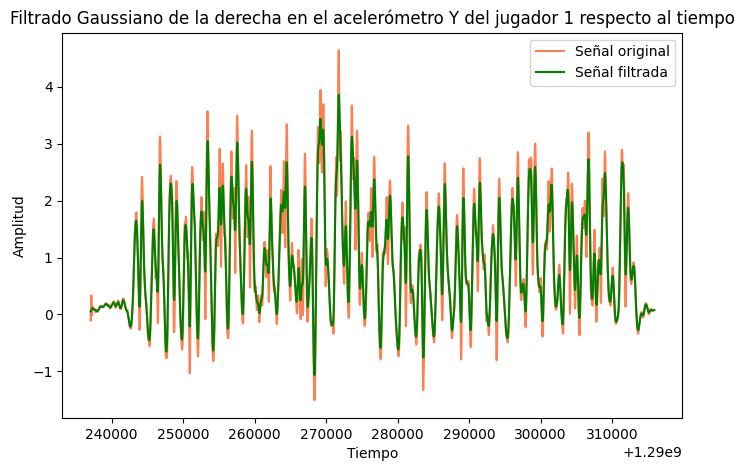

In [30]:

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_X'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_X'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Gaussiano de la derecha en el acelerómetro Y del jugador 1 respecto al tiempo')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()

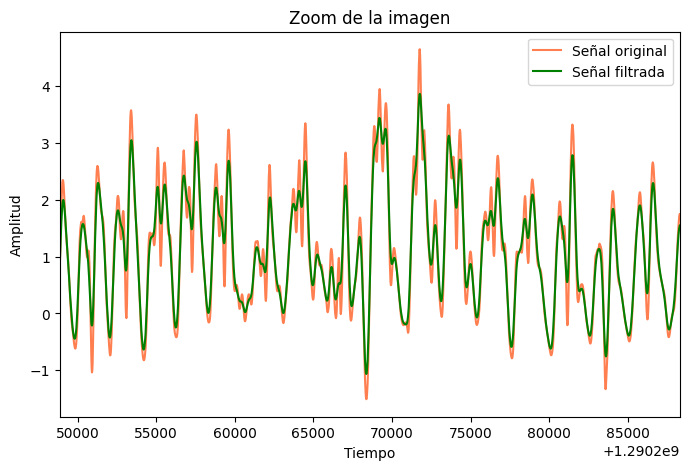

In [31]:

# Calcular el rango del 10% central de la muestra
total_points = len(array_dreta['UNIX_TIMESTAMP'])
start_index = int(total_points * 0.15)  # Inicio del 10% central
end_index = int(total_points * 0.65)    # Fin del 10% central

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_X'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_X'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Zoom de la imagen')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo

# Limitar el eje x al 10% central de la muestra
plt.xlim(array_dreta['UNIX_TIMESTAMP'][start_index], array_dreta['UNIX_TIMESTAMP'][end_index])

plt.show()

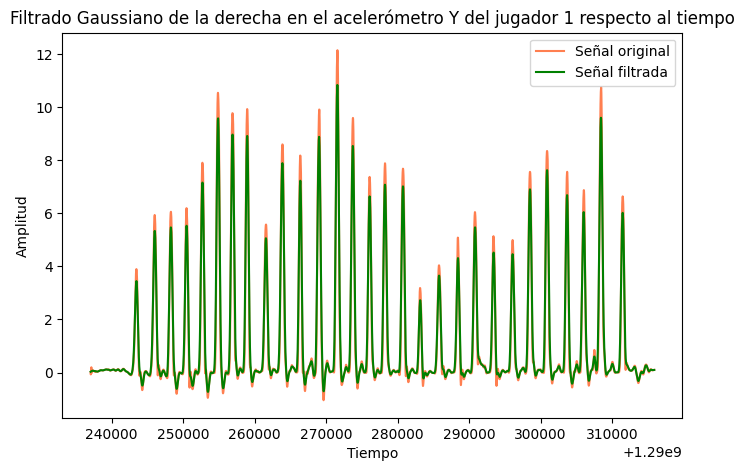

In [32]:

# Aplicar un filtro gaussiano a la señal ACC_Y
filtered_signal = gaussian_filter(array_dreta['ACC_Y'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Filtrado Gaussiano de la derecha en el acelerómetro Y del jugador 1 respecto al tiempo')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()


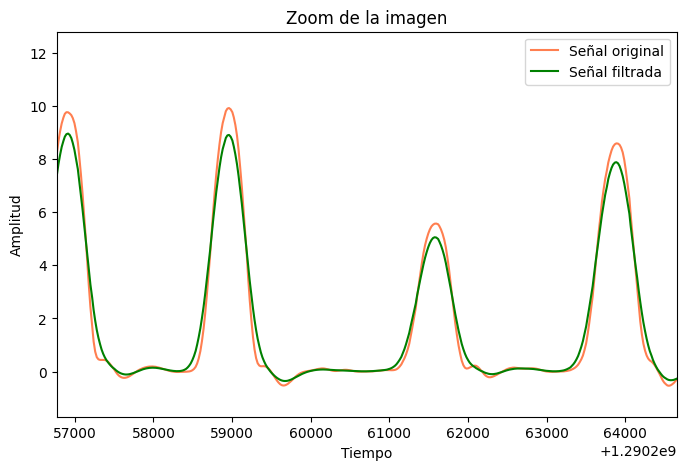

In [33]:
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Calcular el rango del 10% central de la muestra
total_points = len(array_dreta['UNIX_TIMESTAMP'])
start_index = int(total_points * 0.25)  # Inicio del 10% central
end_index = int(total_points * 0.35)    # Fin del 10% central

# Aplicar un filtro gaussiano a la señal ACC_X
filtered_signal = gaussian_filter(array_dreta['ACC_Y'], sigma=5)  # sigma es el parámetro que controla el ancho del filtro gaussiano

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal original', color='coral')
plt.plot(array_dreta['UNIX_TIMESTAMP'], filtered_signal, label='Señal filtrada', color='green')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Zoom de la imagen')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo

# Limitar el eje x al 10% central de la muestra
plt.xlim(array_dreta['UNIX_TIMESTAMP'][start_index], array_dreta['UNIX_TIMESTAMP'][end_index])

plt.show()


In [34]:
#realizamos el filtrado gausiano y la normalización

In [35]:
#derecha
#para eje x
# Eliminar la tendencia de la señal

array_dreta['ACC_X'] = gaussian_filter(array_dreta['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_X'] = (array_dreta['ACC_X'] - np.min(array_dreta['ACC_X'])) / (np.max(array_dreta['ACC_X']) - np.min(array_dreta['ACC_X']))

#para eje y

array_dreta['ACC_Y'] = gaussian_filter(array_dreta['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_Y'] = (array_dreta['ACC_Y'] - np.min(array_dreta['ACC_Y'])) / (np.max(array_dreta['ACC_Y']) - np.min(array_dreta['ACC_Y']))

#para eje z

array_dreta['ACC_Z'] = gaussian_filter(array_dreta['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_dreta['ACC_Z'] = (array_dreta['ACC_Z'] - np.min(array_dreta['ACC_Z'])) / (np.max(array_dreta['ACC_Z']) - np.min(array_dreta['ACC_Z']))


In [36]:

#smash
#para eje x
# Eliminar la tendencia de la señal

array_smash['ACC_X'] = gaussian_filter(array_smash['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_X'] = (array_smash['ACC_X'] - np.min(array_smash['ACC_X'])) / (np.max(array_smash['ACC_X']) - np.min(array_smash['ACC_X']))

#para eje y

array_smash['ACC_Y'] = gaussian_filter(array_smash['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_Y'] = (array_smash['ACC_Y'] - np.min(array_smash['ACC_Y'])) / (np.max(array_smash['ACC_Y']) - np.min(array_smash['ACC_Y']))

#para eje z

array_smash['ACC_Z'] = gaussian_filter(array_smash['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_smash['ACC_Z'] = (array_smash['ACC_Z'] - np.min(array_smash['ACC_Z'])) / (np.max(array_smash['ACC_Z']) - np.min(array_smash['ACC_Z']))


In [37]:
#servicio
#para eje x
# Eliminar la tendencia de la señal

array_serve['ACC_X'] = gaussian_filter(array_serve['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_X'] = (array_serve['ACC_X'] - np.min(array_serve['ACC_X'])) / (np.max(array_serve['ACC_X']) - np.min(array_serve['ACC_X']))

#para eje y

array_serve['ACC_Y'] = gaussian_filter(array_serve['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_Y'] = (array_serve['ACC_Y'] - np.min(array_serve['ACC_Y'])) / (np.max(array_serve['ACC_Y']) - np.min(array_serve['ACC_Y']))

#para eje z

array_serve['ACC_Z'] = gaussian_filter(array_serve['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_serve['ACC_Z'] = (array_serve['ACC_Z'] - np.min(array_serve['ACC_Z'])) / (np.max(array_serve['ACC_Z']) - np.min(array_serve['ACC_Z']))


In [38]:
#reves
#para eje x
# Eliminar la tendencia de la señal

array_reves['ACC_X'] = gaussian_filter(array_reves['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_X'] = (array_reves['ACC_X'] - np.min(array_reves['ACC_X'])) / (np.max(array_reves['ACC_X']) - np.min(array_reves['ACC_X']))

#para eje y

array_reves['ACC_Y'] = gaussian_filter(array_reves['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_Y'] = (array_reves['ACC_Y'] - np.min(array_reves['ACC_Y'])) / (np.max(array_reves['ACC_Y']) - np.min(array_reves['ACC_Y']))

#para eje z

array_reves['ACC_Z'] = gaussian_filter(array_reves['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_reves['ACC_Z'] = (array_reves['ACC_Z'] - np.min(array_reves['ACC_Z'])) / (np.max(array_reves['ACC_Z']) - np.min(array_reves['ACC_Z']))


In [39]:
#volea derecha
#para eje x
# Eliminar la tendencia de la señal

array_vd['ACC_X'] = gaussian_filter(array_vd['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_X'] = (array_vd['ACC_X'] - np.min(array_vd['ACC_X'])) / (np.max(array_vd['ACC_X']) - np.min(array_vd['ACC_X']))

#para eje y

array_vd['ACC_Y'] = gaussian_filter(array_vd['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_Y'] = (array_vd['ACC_Y'] - np.min(array_vd['ACC_Y'])) / (np.max(array_vd['ACC_Y']) - np.min(array_vd['ACC_Y']))

#para eje z

array_vd['ACC_Z'] = gaussian_filter(array_vd['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vd['ACC_Z'] = (array_vd['ACC_Z'] - np.min(array_vd['ACC_Z'])) / (np.max(array_vd['ACC_Z']) - np.min(array_vd['ACC_Z']))


In [40]:
#volea reves
#para eje x
# Eliminar la tendencia de la señal

array_vr['ACC_X'] = gaussian_filter(array_vr['ACC_X'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_X'] = (array_vr['ACC_X'] - np.min(array_vr['ACC_X'])) / (np.max(array_vr['ACC_X']) - np.min(array_vr['ACC_X']))

#para eje y

array_vr['ACC_Y'] = gaussian_filter(array_vr['ACC_Y'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_Y'] = (array_vr['ACC_Y'] - np.min(array_vr['ACC_Y'])) / (np.max(array_vr['ACC_Y']) - np.min(array_vr['ACC_Y']))

#para eje z

array_vr['ACC_Z'] = gaussian_filter(array_vr['ACC_Z'], sigma=5)
# Normalizar la señal entre 0 y 1 
array_vr['ACC_Z'] = (array_vr['ACC_Z'] - np.min(array_vr['ACC_Z'])) / (np.max(array_vr['ACC_Z']) - np.min(array_vr['ACC_Z']))


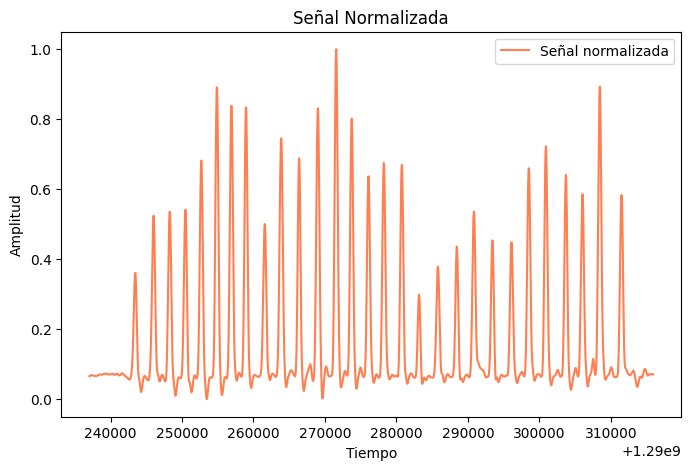

In [41]:

# Graficar la señal original y la señal filtrada
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Y'], label='Señal normalizada', color='coral')

plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal Normalizada')
plt.legend()
plt.grid(False)  # Quitar la cuadrícula del fondo
plt.show()


# DETECCION DE GOLPES

# DERECHA DE ACC

## Miramos para el eje x el y y el z, cuantos picos detecta

0.17905388398655125
0.4078642513237186
[ 356  480  594  703  808  912 1012 1113 1243 1354 1480 1586 1713 1839
 1958 2067 2192 2320 2445 2574 2687 2821 2950 3068 3182 3293 3437 3551
 3670]


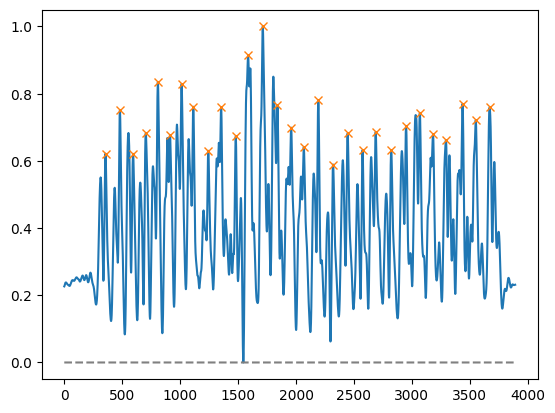

distancia media 118.35714285714286
numero total de golpes 29


In [42]:
#para x
peak_height = np.std(array_dreta['ACC_X'])
mean_signal = np.mean(array_dreta['ACC_X'])
print(peak_height)
print(mean_signal)

peaks, _ = find_peaks(array_dreta['ACC_X'], height=mean_signal + peak_height, distance = 100)
print(peaks)
plt.plot(array_dreta['ACC_X'])
plt.plot(peaks, array_dreta['ACC_X'][peaks], "x")
plt.plot(np.zeros_like(array_dreta['ACC_X']), "--", color="gray")
plt.show()
# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('distancia media' ,mean_distance_between_peaks)
num_peaks = len(peaks)
print('numero total de golpes', num_peaks)

Altura del pico: 0.19243003962630995
Media de la señal: 0.1678855033515106


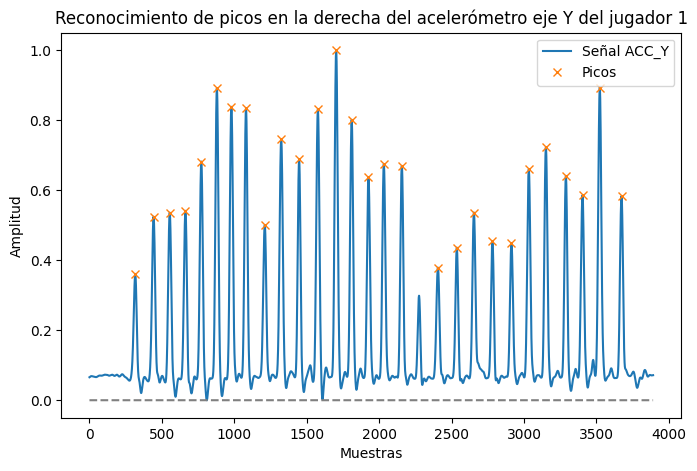

Distancia media entre picos: 124.33333333333333
Número total de picos: 28


In [43]:

# Calcular la altura del pico y la media de la señal
peak_height = np.std(array_dreta['ACC_Y'])
mean_signal = np.mean(array_dreta['ACC_Y'])
print("Altura del pico:", peak_height)
print("Media de la señal:", mean_signal)

# Encontrar picos en la señal ACC_Y
peaks, _ = find_peaks(array_dreta['ACC_Y'], height=mean_signal + peak_height, distance=2)

# Graficar la señal y los picos
plt.figure(figsize=(8, 5))
plt.plot(array_dreta['ACC_Y'], label='Señal ACC_Y')
plt.plot(peaks, np.array(array_dreta['ACC_Y'])[peaks], "x", label='Picos')
plt.plot(np.zeros_like(array_dreta['ACC_Y']), "--", color="gray")
plt.title('Reconocimiento de picos en la derecha del acelerómetro eje Y del jugador 1')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('Distancia media entre picos:', mean_distance_between_peaks)

# Número total de picos
num_peaks = len(peaks)
print('Número total de picos:', num_peaks)

0.20032777499178347
0.8215288875199586


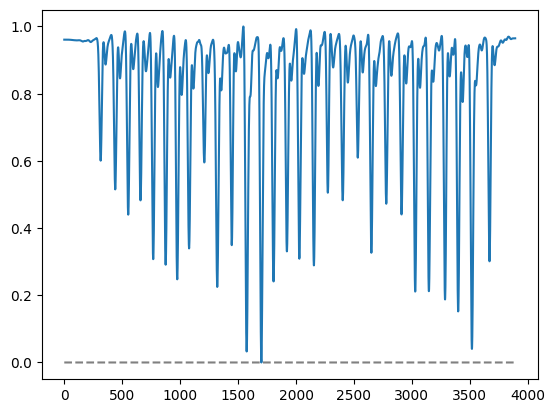

distancia media nan
numero total de golpes 0
entro aqui


C:\Users\Holacons\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Holacons\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


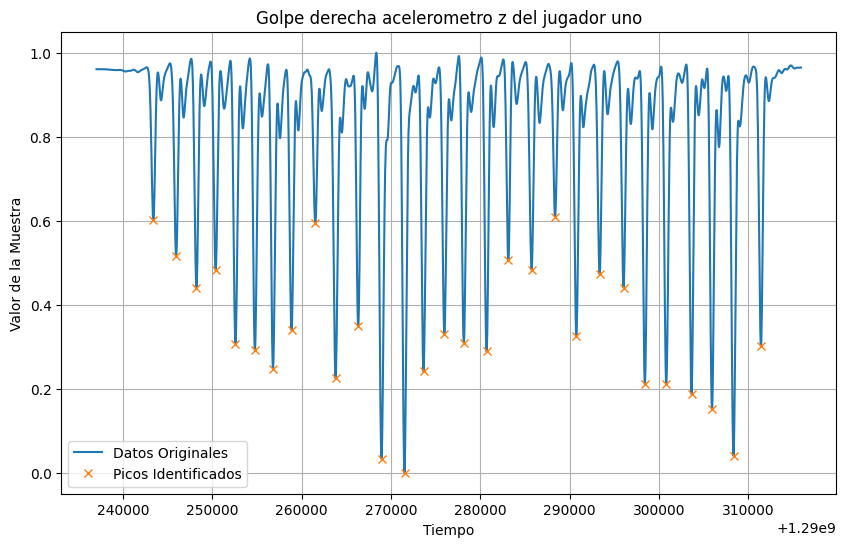

0.20032777499178347
-0.8215288875199586
distancia media 119.82142857142857
numero total de golpes 29


In [44]:
#para el eje z

peak_height = np.std(array_dreta['ACC_Z'])
mean_signal = np.mean(array_dreta['ACC_Z'])
print(peak_height)
print(mean_signal)

peaks, _ = find_peaks(array_dreta['ACC_Z'], height=mean_signal + peak_height, distance = 100)

peaks_tiempo = array_dreta['UNIX_TIMESTAMP'][peaks]
plt.plot(array_dreta['ACC_Z'])
plt.plot(peaks, array_dreta['ACC_Z'][peaks], "x")
plt.plot(np.zeros_like(array_dreta['ACC_Z']), "--", color="gray")
plt.show()
# Calcular la distancia entre los picos
distances_between_peaks = np.diff(peaks)

# Calcular la media de la distancia entre picos
mean_distance_between_peaks = np.mean(distances_between_peaks)
print('distancia media' ,mean_distance_between_peaks)
num_peaks = len(peaks)
print('numero total de golpes', num_peaks)

if (mean_distance_between_peaks <=  100) and (mean_distance_between_peaks >=  150):
    plt.plot(array_dreta['ACC_Z'])
    plt.plot(peaks, array_dreta['ACC_Z'][peaks], "x")
    plt.plot(np.zeros_like(array_dreta['ACC_Z']), "--", color="gray")
    plt.show()
else:
    print('entro aqui')
    # Invertir el signo de los datos
    array1_z1_invertido = -array_dreta['ACC_Z']

    # Calcular la desviación estándar y la media del array invertido
    peak_height = np.std(array1_z1_invertido)
    mean_signal = np.mean(array1_z1_invertido)

    # Encontrar picos negativos
    peaks, _ = find_peaks(array1_z1_invertido, height=mean_signal + peak_height, distance=100)


    plt.figure(figsize=(10, 6))
    plt.plot(array_dreta['UNIX_TIMESTAMP'], array_dreta['ACC_Z'], label='Datos Originales')
    plt.plot(array_dreta['UNIX_TIMESTAMP'][peaks], array_dreta['ACC_Z'][peaks], 'x', label='Picos Identificados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la Muestra')
    plt.title('Golpe derecha acelerometro z del jugador uno')
    plt.legend()
    plt.grid(True)
    plt.show()
    print(peak_height)
    print(mean_signal)

    distances_between_peaks = np.diff(peaks)
    mean_distance_between_peaks = np.mean(distances_between_peaks)
    print('distancia media' ,mean_distance_between_peaks)
    num_peaks = len(peaks)
    print('numero total de golpes', num_peaks)





In [45]:
#creamos una funcion que calcule la media de la muestra 
#y si es menor que 0.5 busque puntos positivos y si es mayor que 0.5 busque puntos negativos

Media de la señal: 0.4078642513237186
Altura del pico: 0.17905388398655125
Distancia media entre picos: 118.35714285714286
Número total de golpes: 29


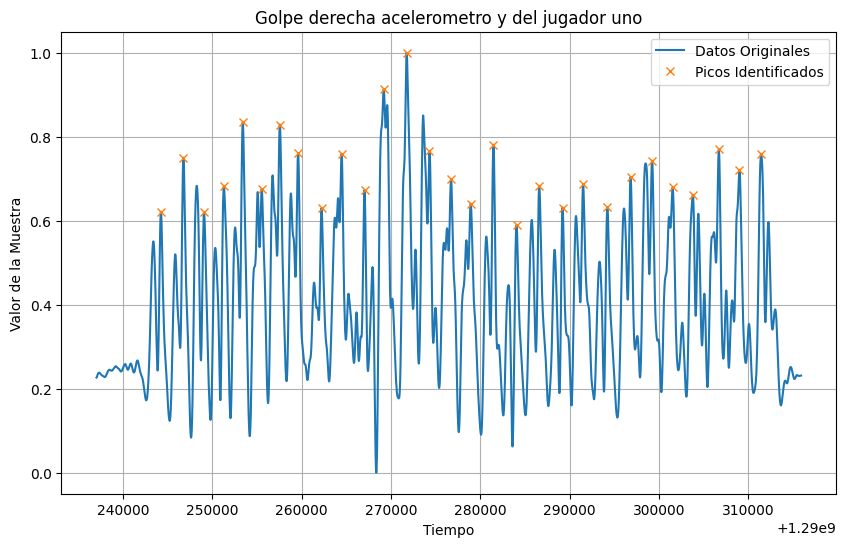

array([ 356,  480,  594,  703,  808,  912, 1012, 1113, 1243, 1354, 1480,
       1586, 1713, 1839, 1958, 2067, 2192, 2320, 2445, 2574, 2687, 2821,
       2950, 3068, 3182, 3293, 3437, 3551, 3670], dtype=int64)

In [47]:


def analyze_signal(array, eje):
    # Calcular la media de la señal ACC_Z
    mean_signal = np.mean(array[eje])
    print(f'Media de la señal: {mean_signal}')
    
    # Determinar si buscar picos positivos o negativos
    if mean_signal < 0.5:
        signal_to_analyze = array[eje]
        direction = "positive"
    else:
        signal_to_analyze = -array[eje]
        direction = "negative"
    
    # Calcular la desviación estándar
    peak_height = np.std(array[eje])
    
    # Ajustar el umbral de altura para los picos negativos
    height_threshold = mean_signal + peak_height if direction == "positive" else -mean_signal + peak_height
    
    # Encontrar picos en la señal
    peaks, _ = find_peaks(signal_to_analyze, height=height_threshold, distance=100)
    
    # Calcular la distancia entre los picos
    distances_between_peaks = np.diff(peaks)
    
    # Calcular la media de la distancia entre picos
    mean_distance_between_peaks = np.mean(distances_between_peaks)
    
    # Número total de picos
    num_peaks = len(peaks)
    
    print(f'Altura del pico: {peak_height}')
    print(f'Distancia media entre picos: {mean_distance_between_peaks}')
    print(f'Número total de golpes: {num_peaks}')
    
    # Graficar la señal y los picos
    plt.figure(figsize=(10, 6))
    plt.plot(array['UNIX_TIMESTAMP'], array[eje], label='Datos Originales')
    plt.plot(array['UNIX_TIMESTAMP'][peaks], array[eje][peaks], 'x', label='Picos Identificados')
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la Muestra')
    plt.title('Golpe derecha acelerometro y del jugador uno')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return peaks



# Llamar a la función con los datos
analyze_signal(array_dreta, 'ACC_X')


Media de la señal: 0.1678855033515106
Altura del pico: 0.19243003962630995
Distancia media entre picos: 124.33333333333333
Número total de golpes: 28


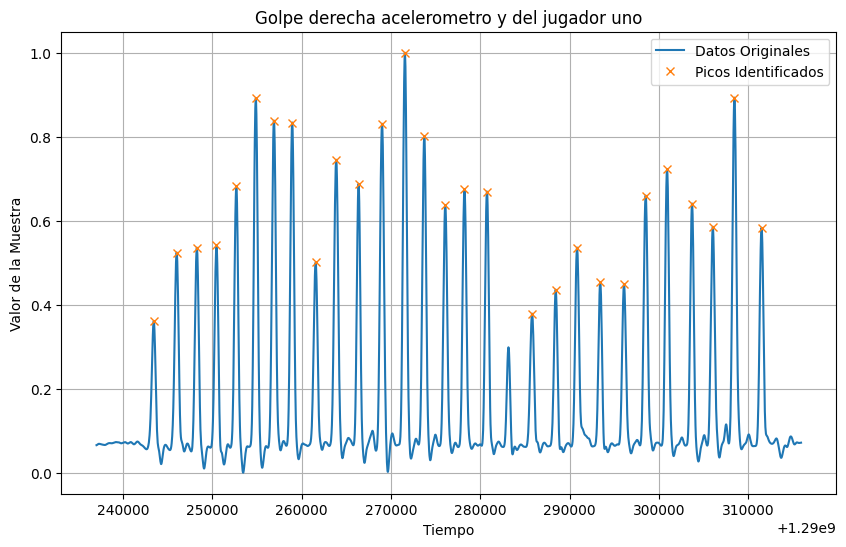

array([ 316,  443,  554,  662,  772,  880,  980, 1081, 1210, 1324, 1447,
       1577, 1703, 1810, 1926, 2032, 2156, 2406, 2536, 2654, 2782, 2913,
       3033, 3151, 3289, 3404, 3523, 3673], dtype=int64)

In [48]:
# Llamar a la función con los datos
peaks = analyze_signal(array_dreta, 'ACC_Y')

Media de la señal: 0.8215288875199586
Altura del pico: 0.20032777499178347
Distancia media entre picos: 119.82142857142857
Número total de golpes: 29


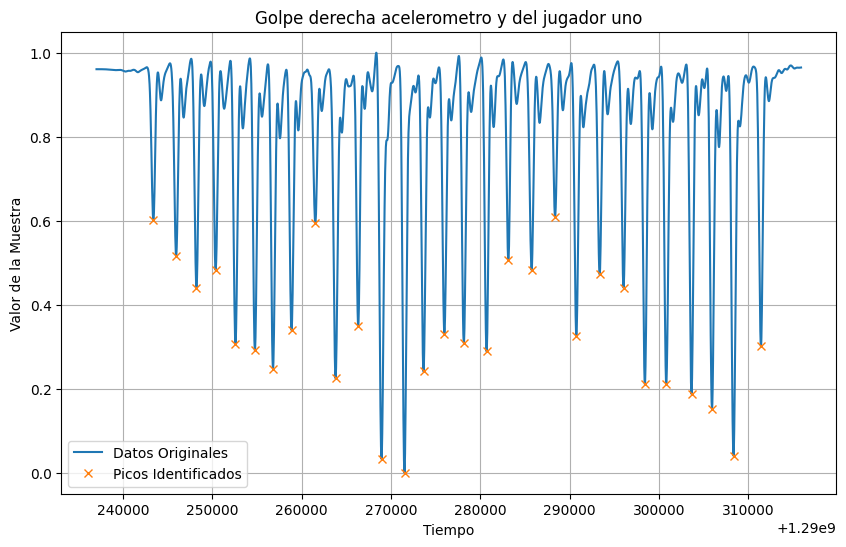

array([ 314,  440,  552,  658,  767,  875,  975, 1077, 1208, 1320, 1445,
       1574, 1701, 1806, 1921, 2029, 2154, 2274, 2403, 2533, 2650, 2779,
       2911, 3028, 3147, 3286, 3399, 3518, 3669], dtype=int64)

In [49]:
# Llamar a la función con los datos
peaks = analyze_signal(array_dreta, 'ACC_Z')

In [50]:
#Escogemos uno de los ejes para decidir la cantidad de golpe

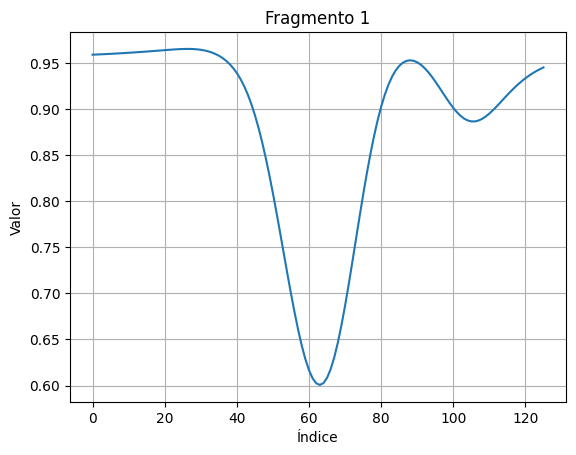

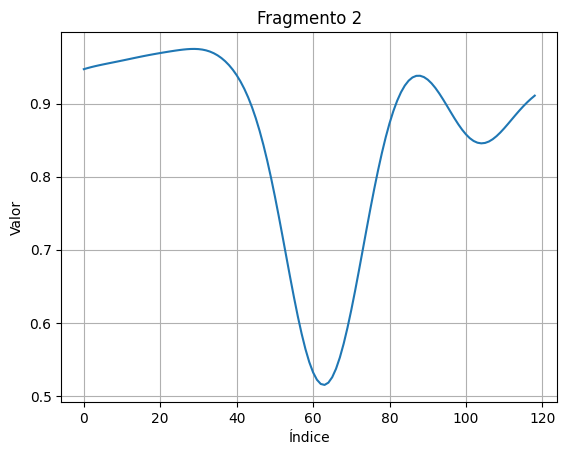

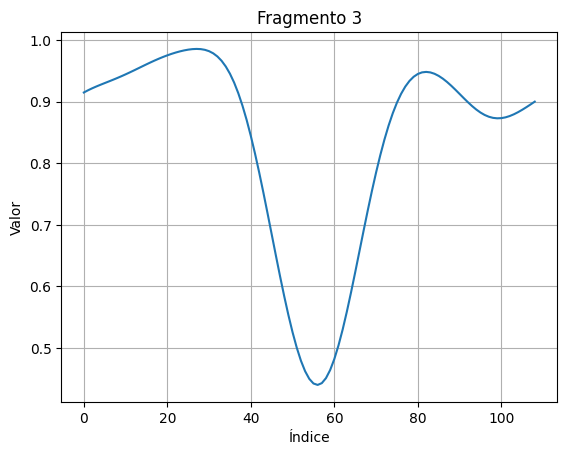

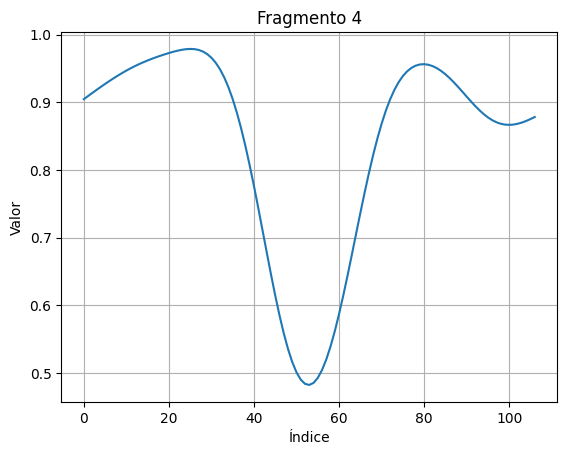

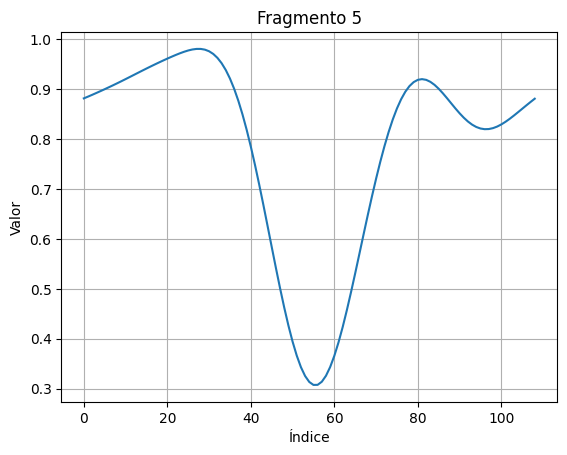

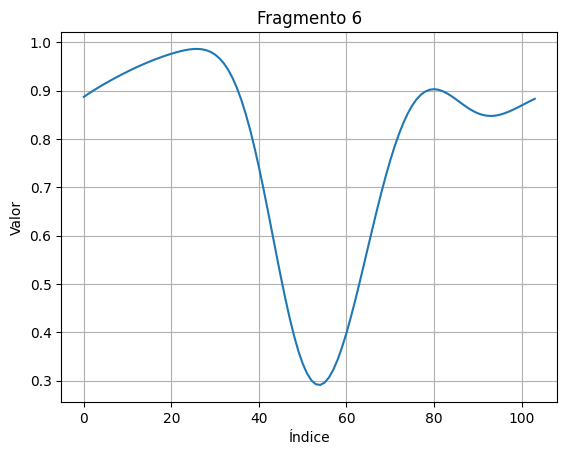

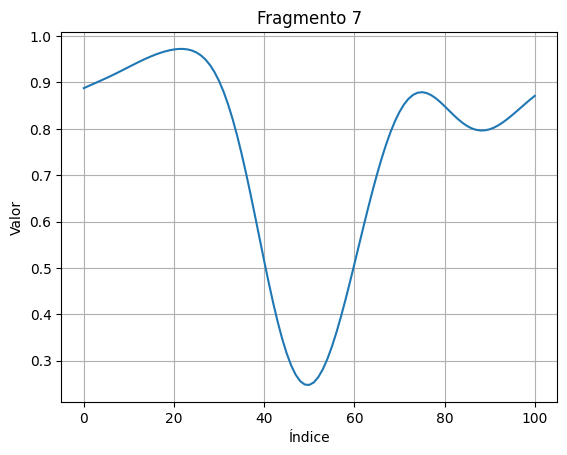

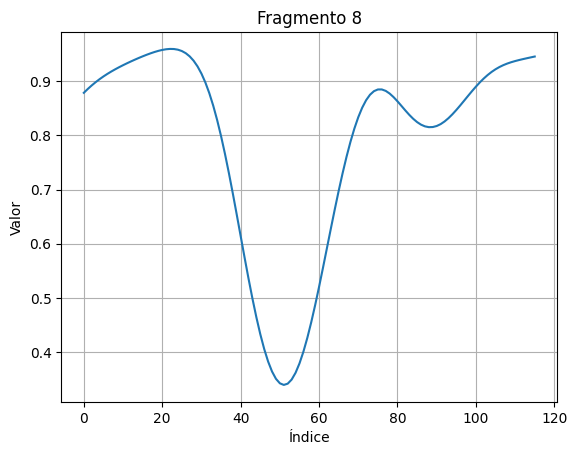

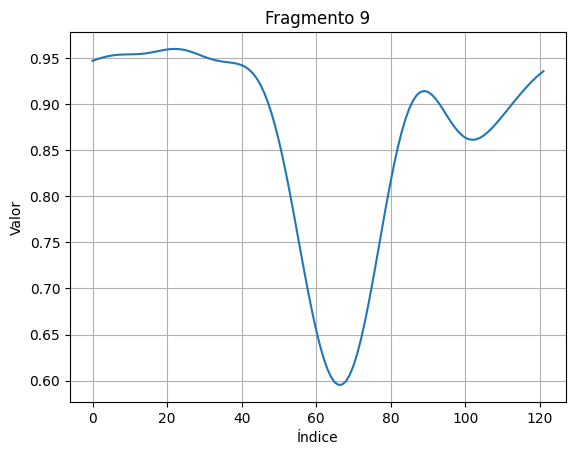

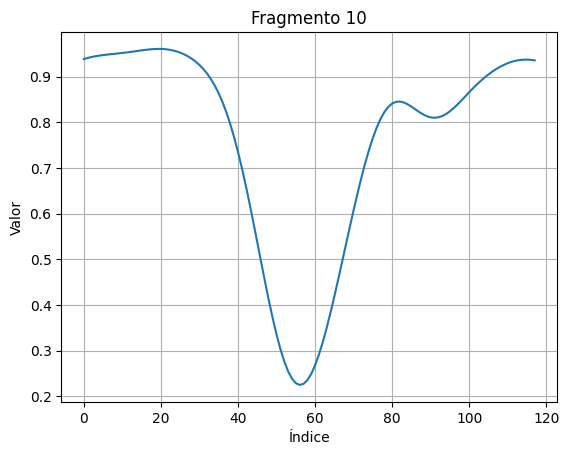

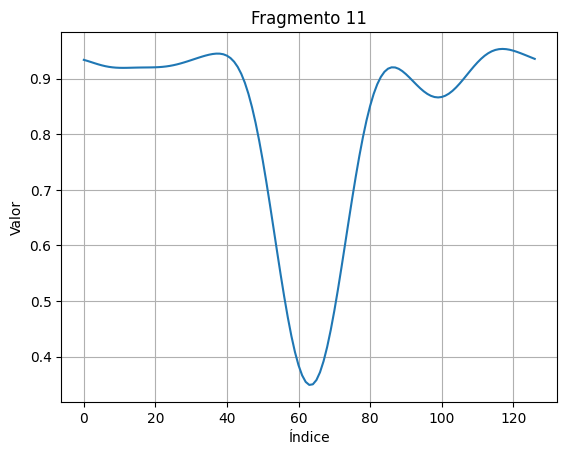

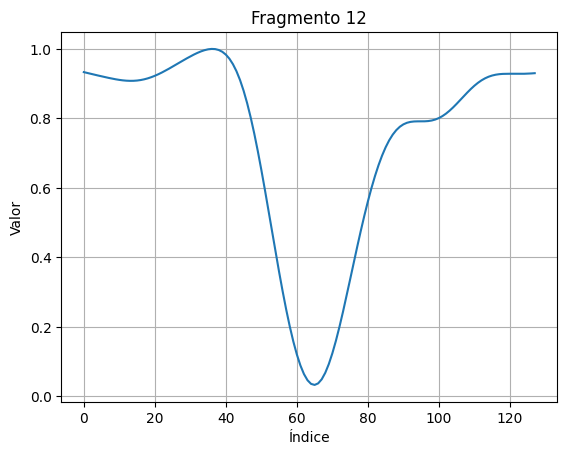

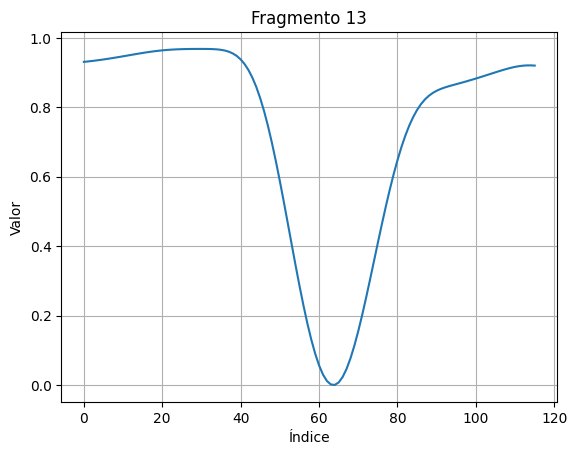

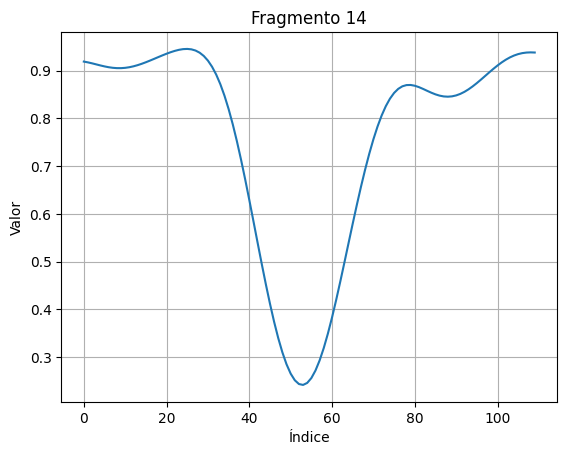

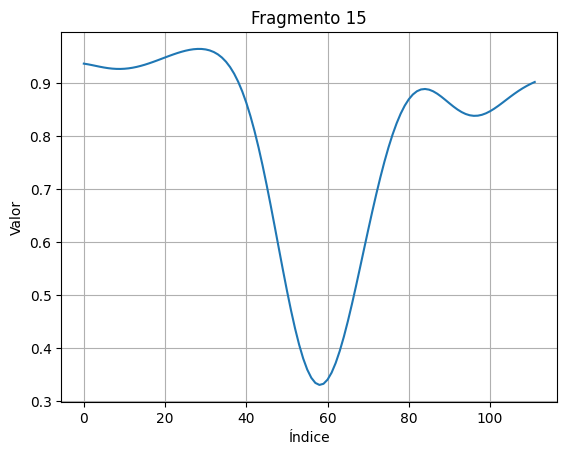

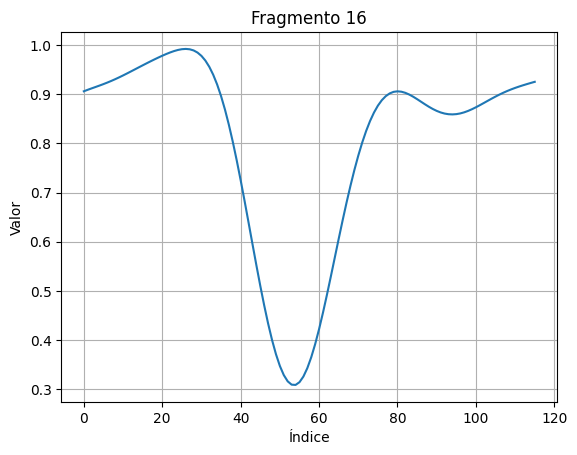

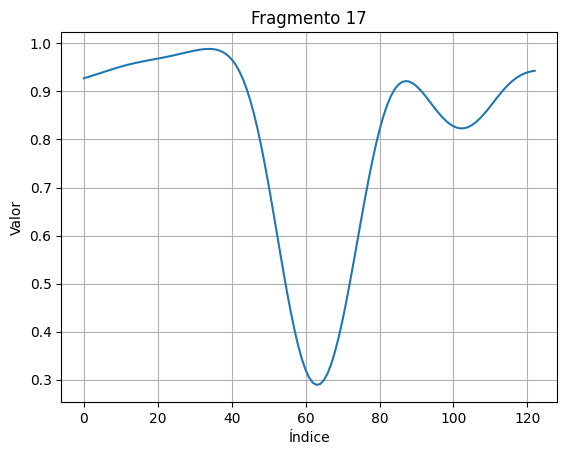

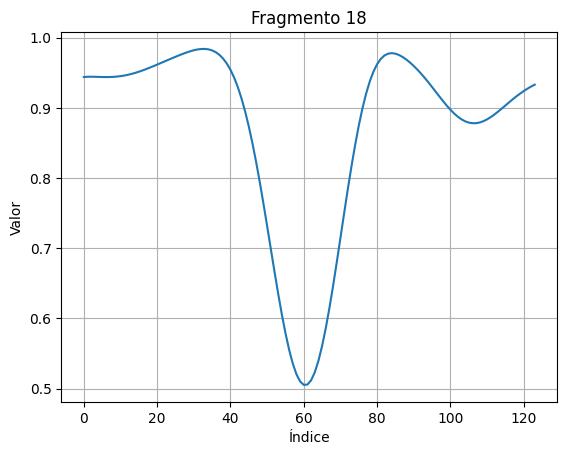

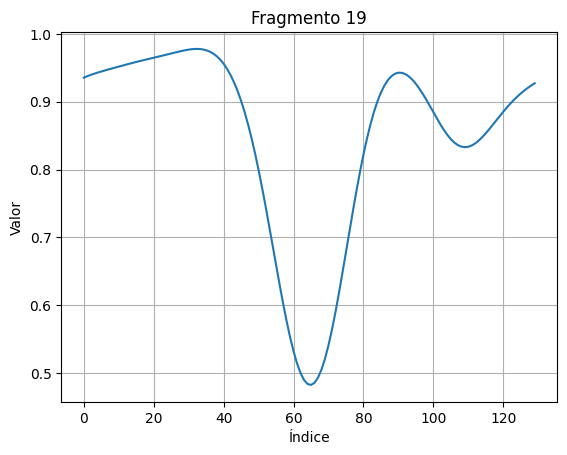

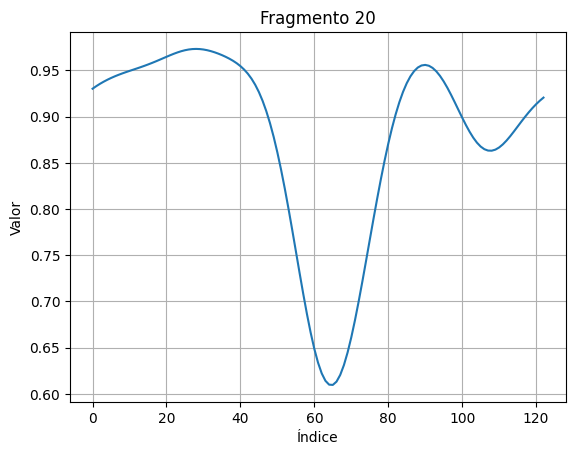

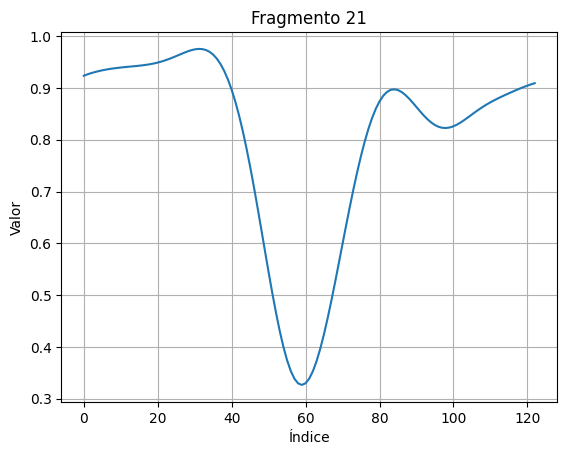

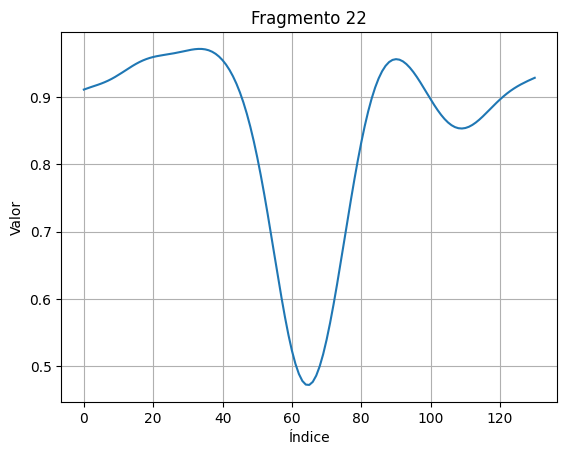

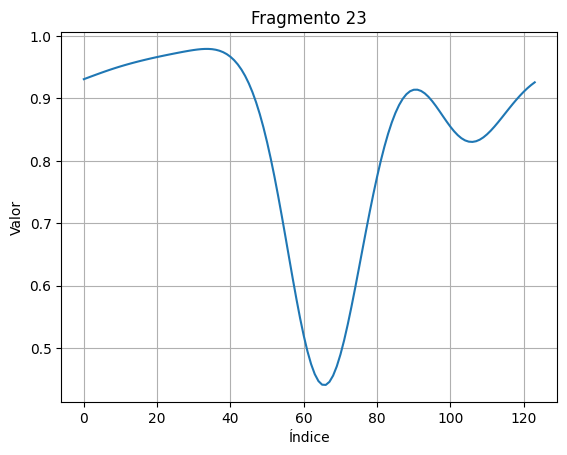

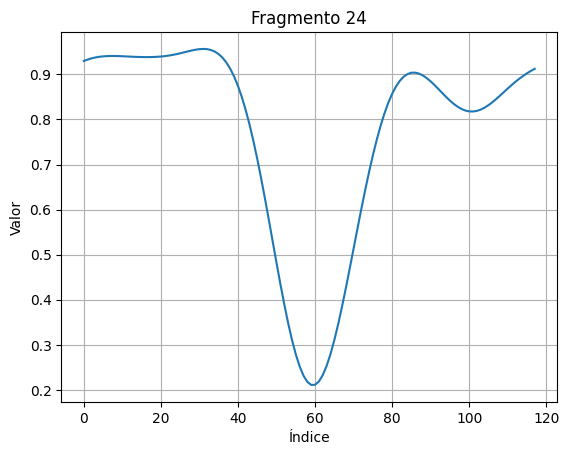

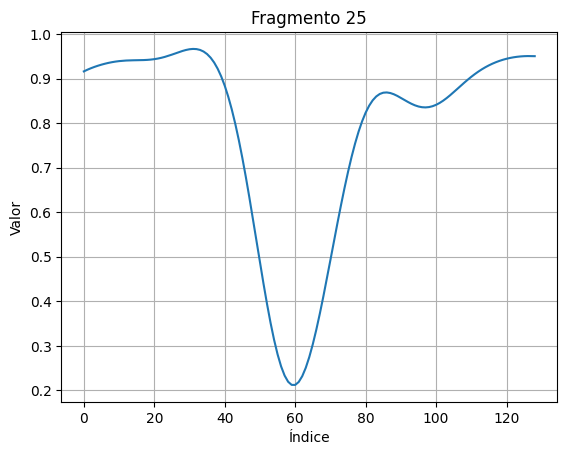

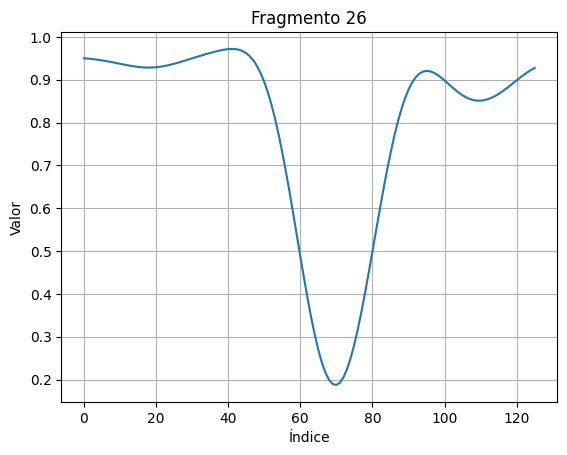

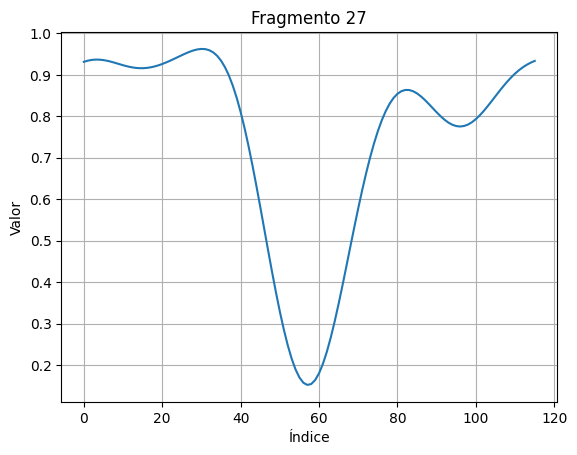

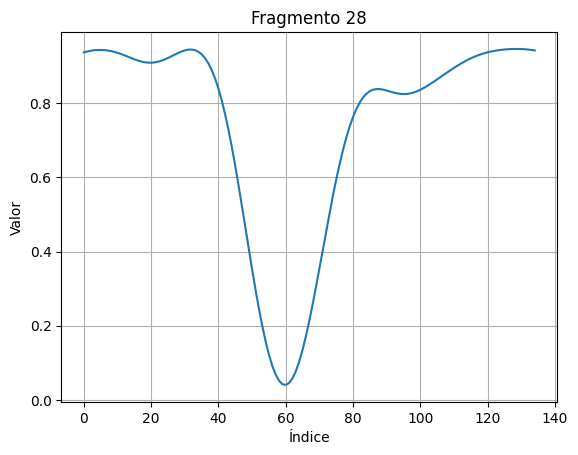

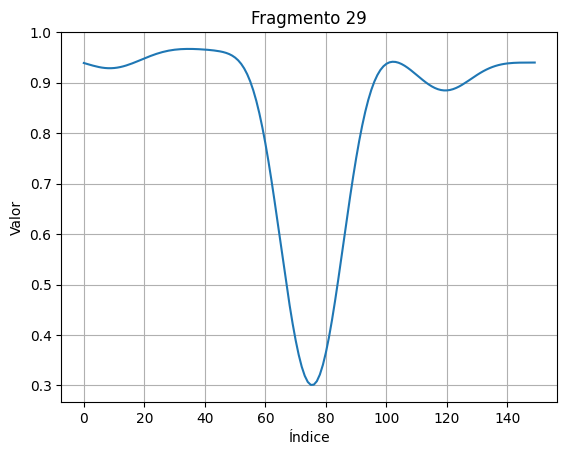

In [51]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_dreta[start_index:end_index]
    
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    

    

In [ ]:

# Directorio donde se guardarán los archivos CSV
directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# Si el directorio no existe, créalo
if not os.path.exists(directory):
    os.makedirs(directory)

# Itera sobre los fragmentos y guárdalos como archivos CSV
for i, fragment in enumerate(fragments):
    # Nombre del archivo CSV
    filename = os.path.join(directory, f"derecha_J1_{i+1}.csv")
    
    # Abre el archivo CSV en modo escritura
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Escribe los datos del fragmento en el archivo CSV
        for row in fragment:
            writer.writerow(row)


# REVES DE ACC

In [ ]:
#realizamos lo mismo para el reves 

Media de la señal: 0.4756827451015598
Altura del pico: 0.1329892192002792
Distancia media entre picos: 159.03703703703704
Número total de golpes: 28


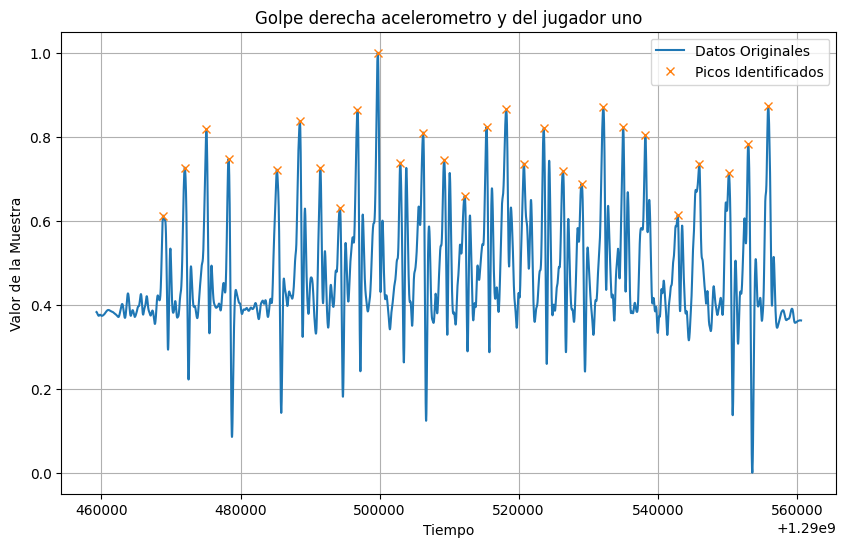

array([ 473,  626,  780,  937, 1280, 1443, 1588, 1727, 1852, 1996, 2156,
       2318, 2467, 2613, 2768, 2908, 3033, 3173, 3310, 3442, 3597, 3738,
       3895, 4124, 4278, 4488, 4626, 4767], dtype=int64)

In [52]:
# Llamar a la función con los datos
peaks = analyze_signal(array_reves, 'ACC_X')

Media de la señal: 0.1953489043995351
Altura del pico: 0.14298248560687507
Distancia media entre picos: 159.11111111111111
Número total de golpes: 28


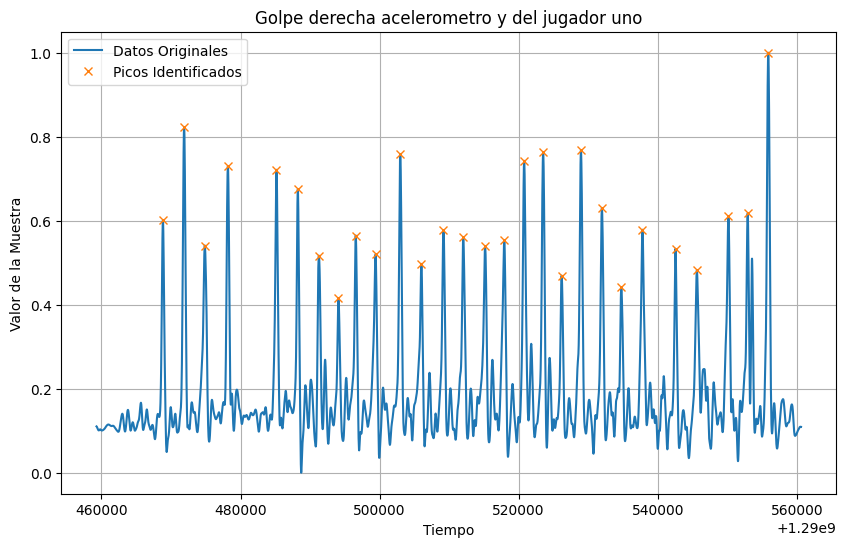

array([ 471,  622,  769,  932, 1277, 1429, 1578, 1717, 1840, 1980, 2156,
       2306, 2462, 2603, 2758, 2894, 3035, 3170, 3301, 3438, 3587, 3724,
       3874, 4109, 4261, 4485, 4621, 4767], dtype=int64)

In [53]:
peaks = analyze_signal(array_reves, 'ACC_Y')

Media de la señal: 0.7172380948551372
Altura del pico: 0.1639455726771174
Distancia media entre picos: 158.74074074074073
Número total de golpes: 28


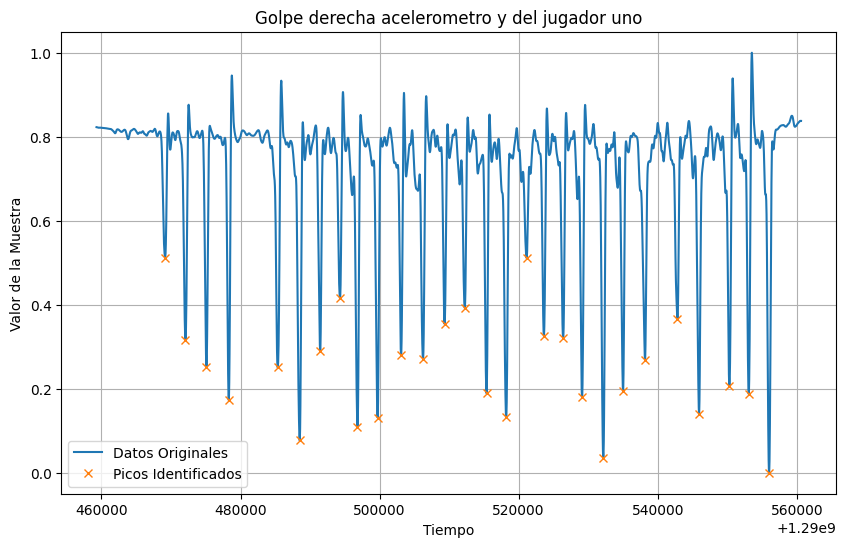

In [56]:
peaks = analyze_signal(array_reves, 'ACC_Z')

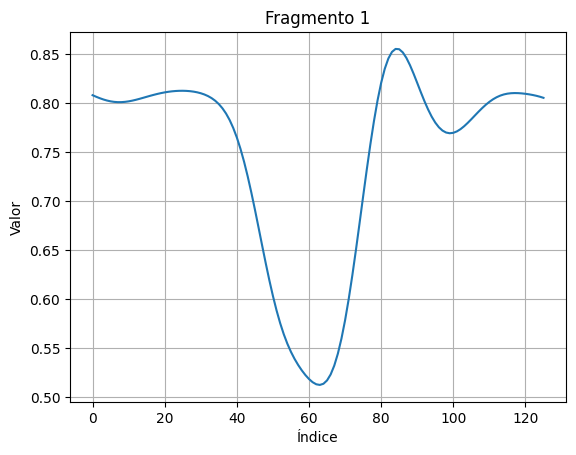

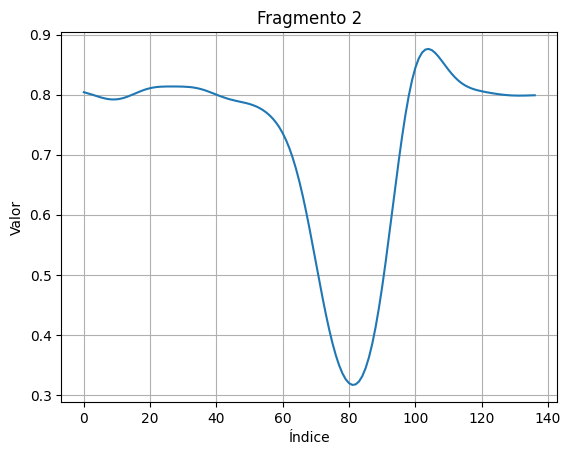

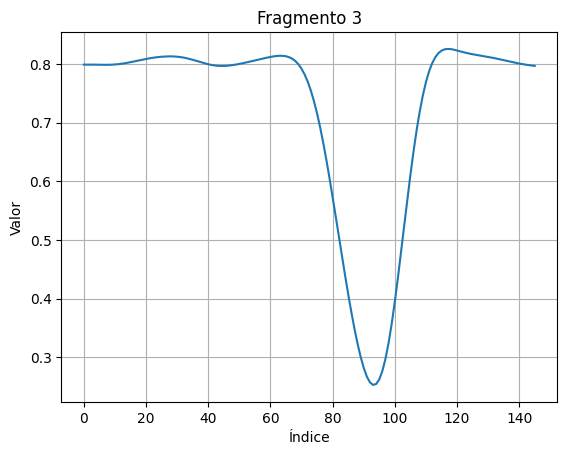

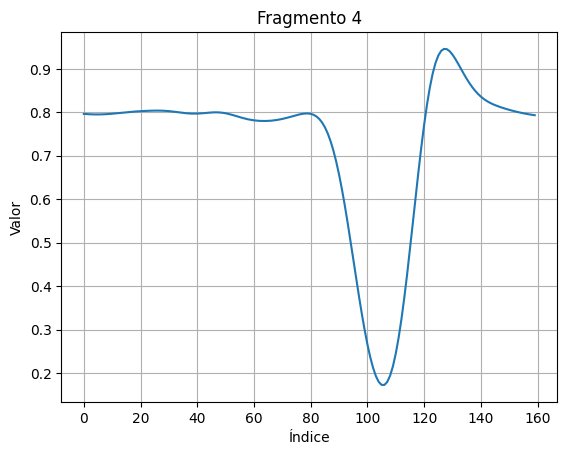

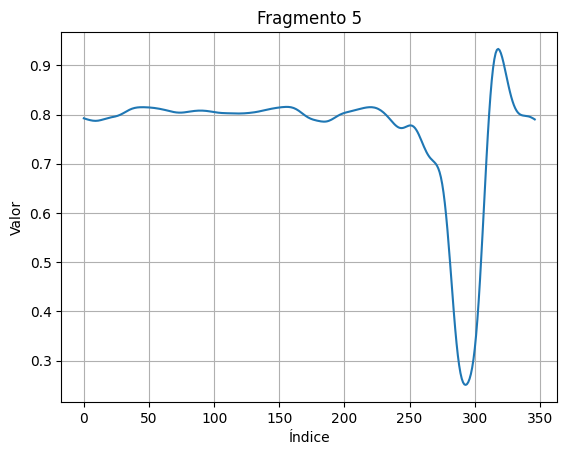

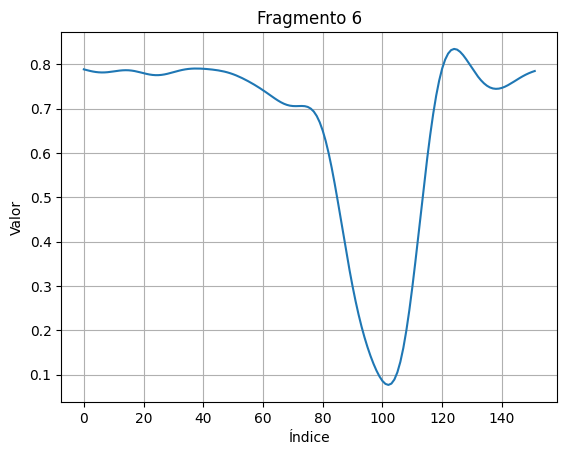

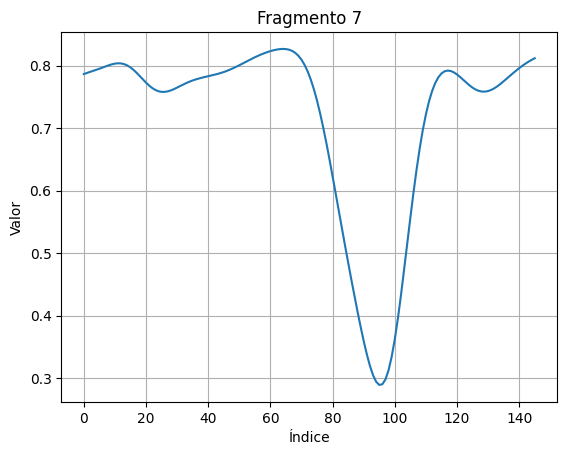

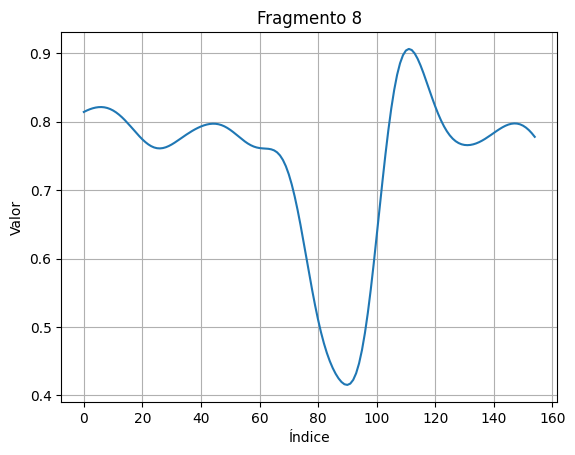

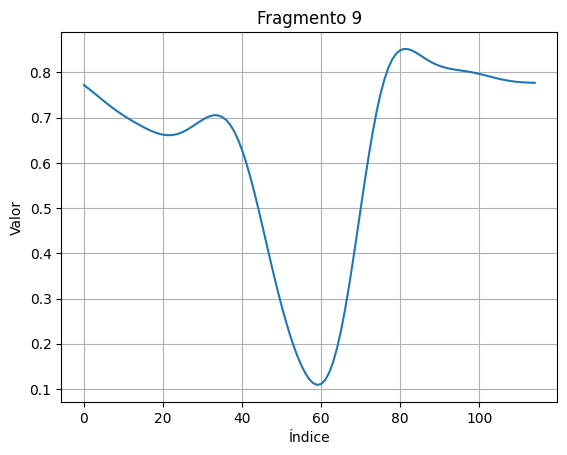

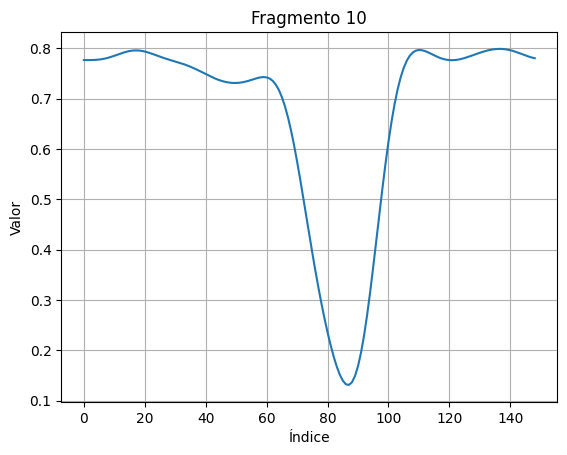

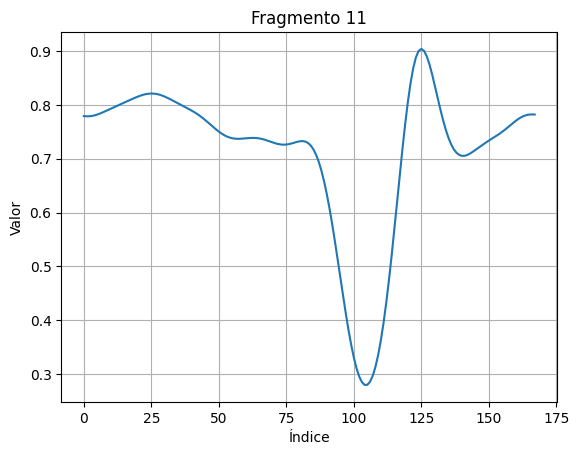

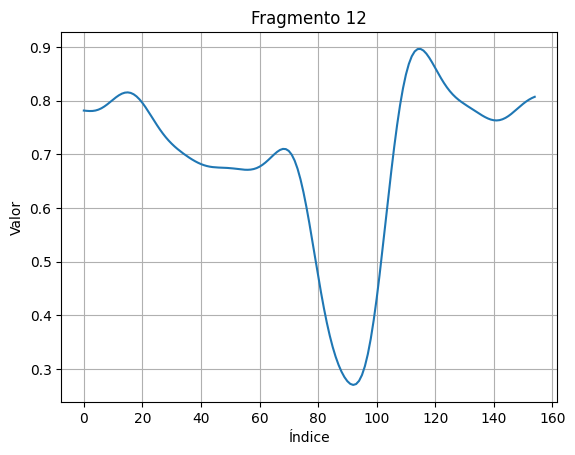

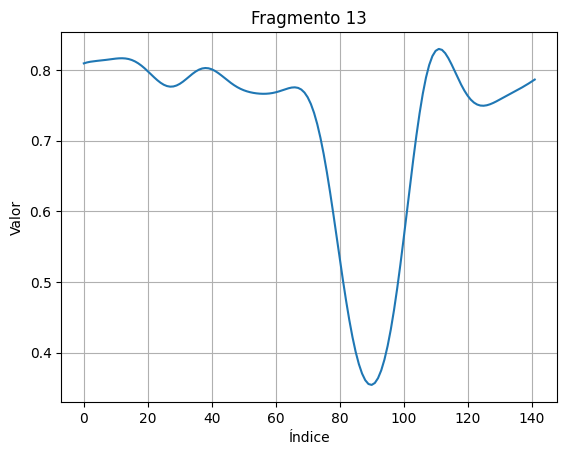

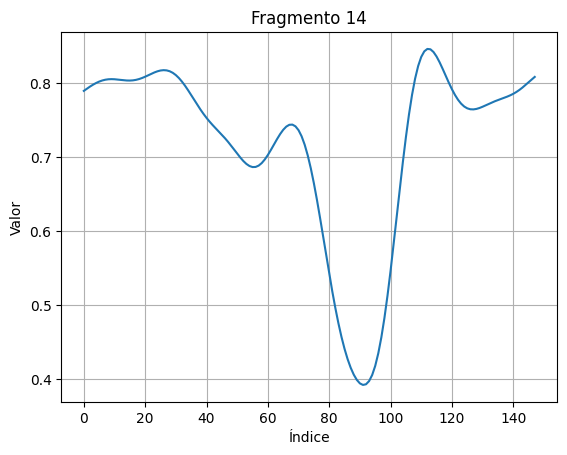

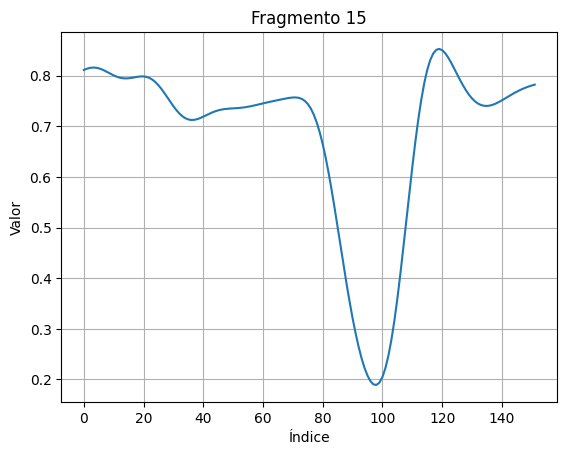

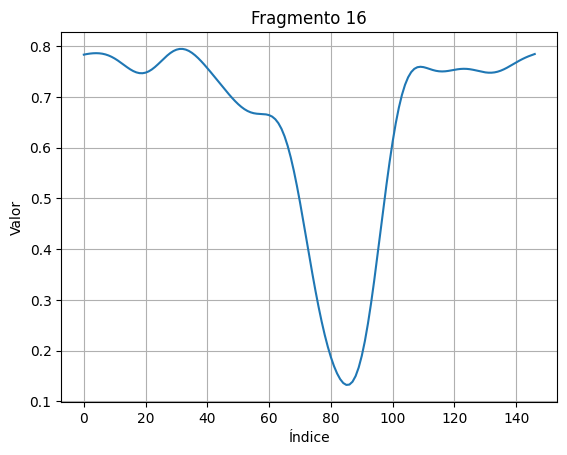

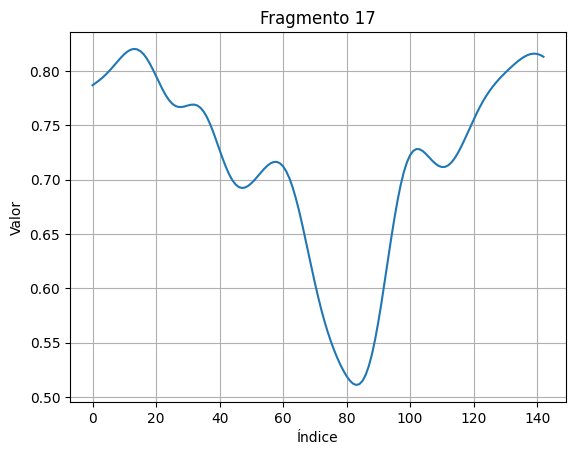

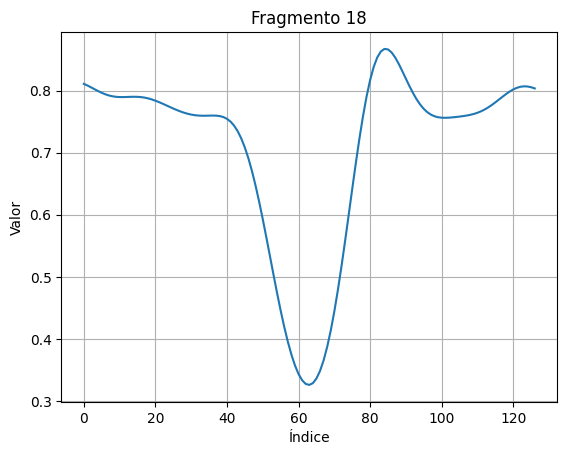

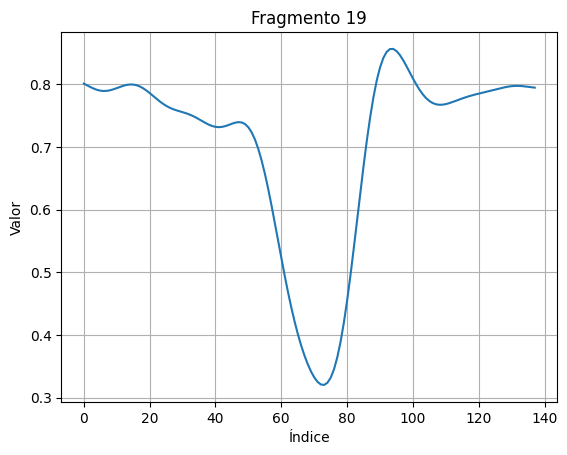

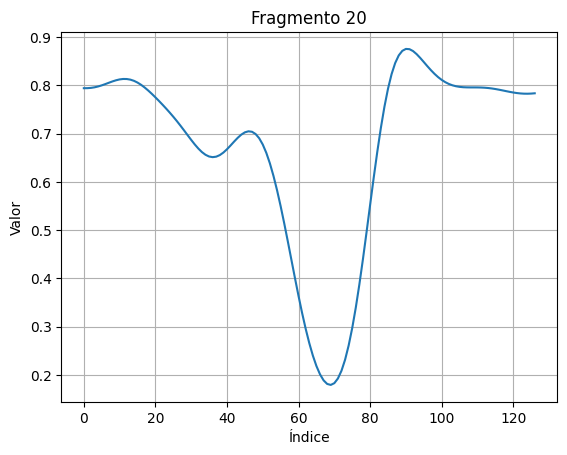

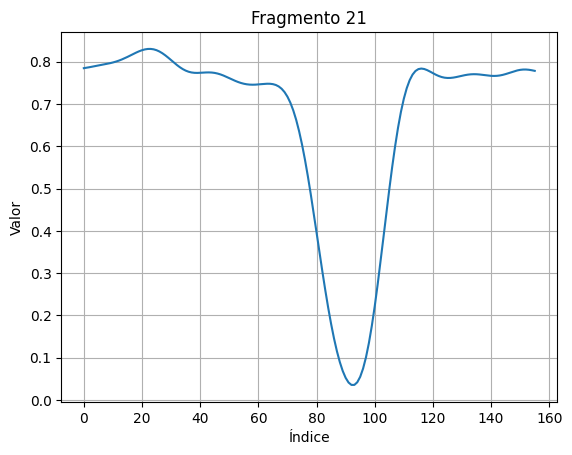

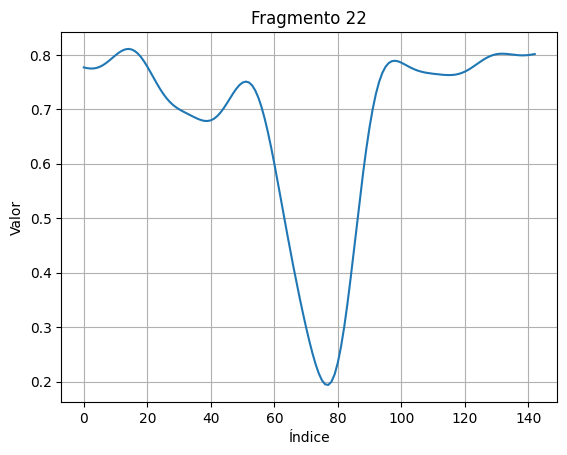

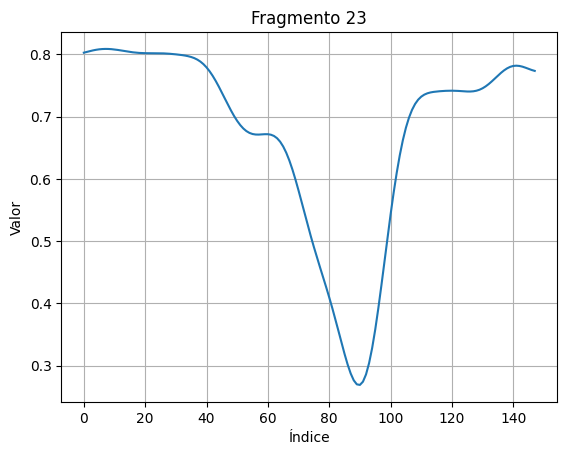

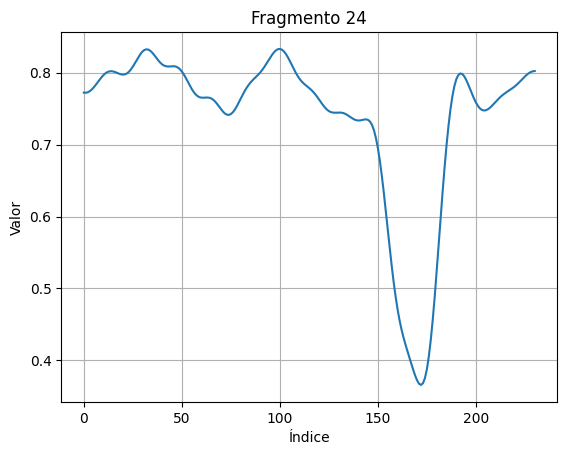

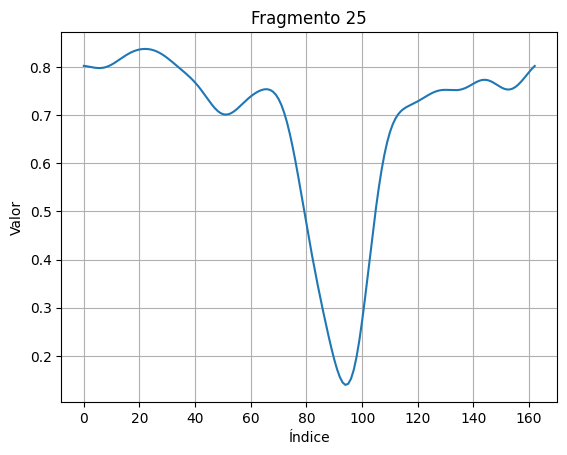

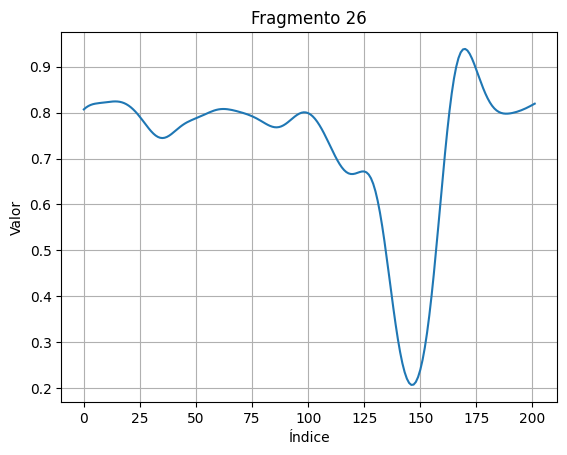

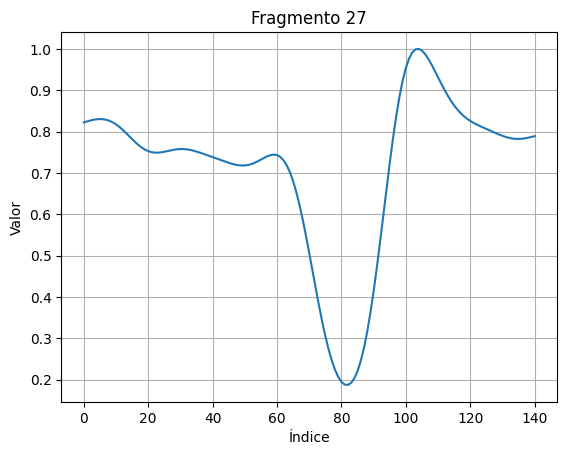

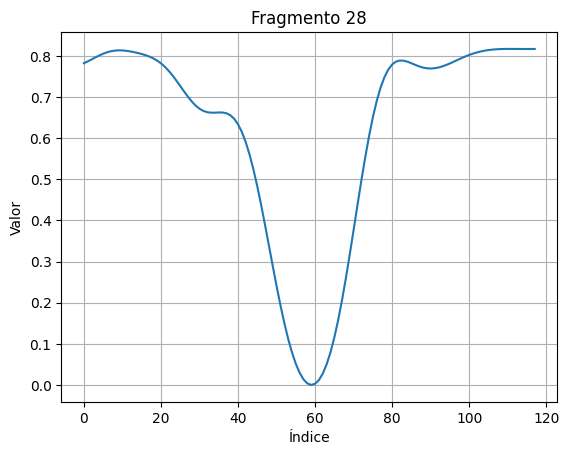

In [57]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_reves[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    



In [ ]:

# Directorio donde se guardarán los archivos CSV
directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# Si el directorio no existe, se crea
if not os.path.exists(directory):
    os.makedirs(directory)

# Itera sobre los fragmentos y guárdalos como archivos CSV
for i, fragment in enumerate(fragments):
    # Nombre del archivo CSV
    filename = os.path.join(directory, f"reves_J1_{i+1}.csv")
    
    # Abre el archivo CSV en modo escritura
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Escribe los datos del fragmento en el archivo CSV
        for row in fragment:
            writer.writerow(row)

# SERVICIO ACC

Media de la señal: 0.31654434577890134
Altura del pico: 0.16452677012450054
Distancia media entre picos: 279.0
Número total de golpes: 15


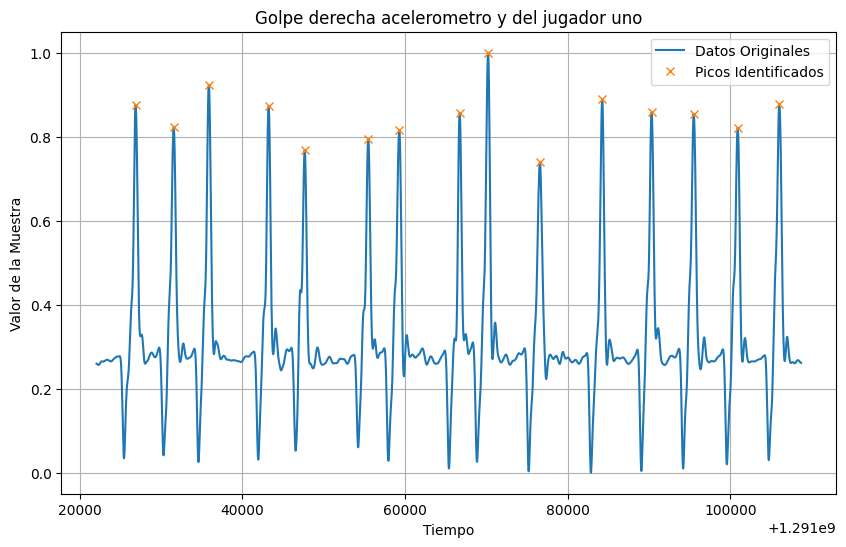

In [58]:

peaks = analyze_signal(array_serve, 'ACC_X')

Media de la señal: 0.3655973632894498
Altura del pico: 0.14037832764652328
Distancia media entre picos: 279.14285714285717
Número total de golpes: 15


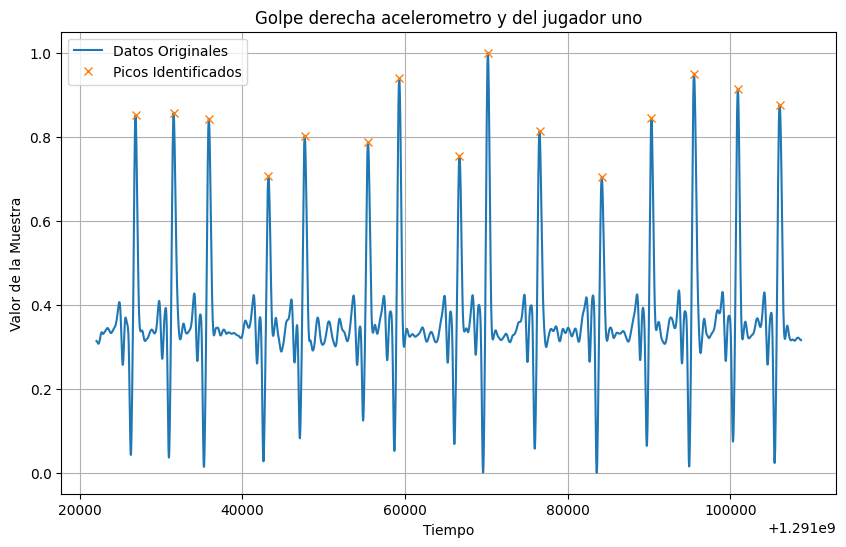

In [59]:
peaks = analyze_signal(array_serve, 'ACC_Y')

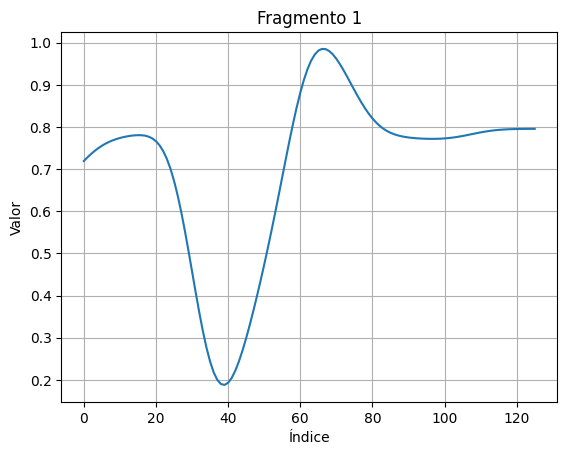

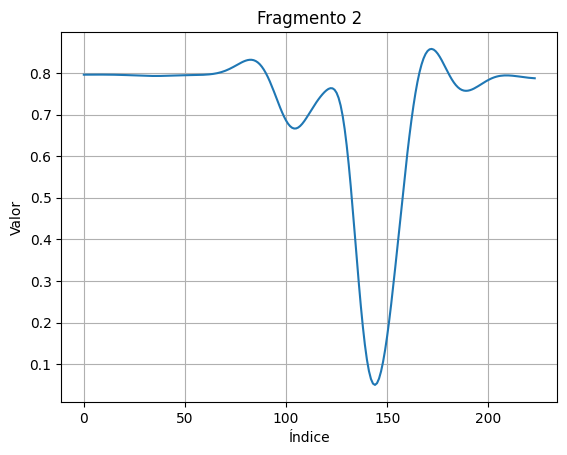

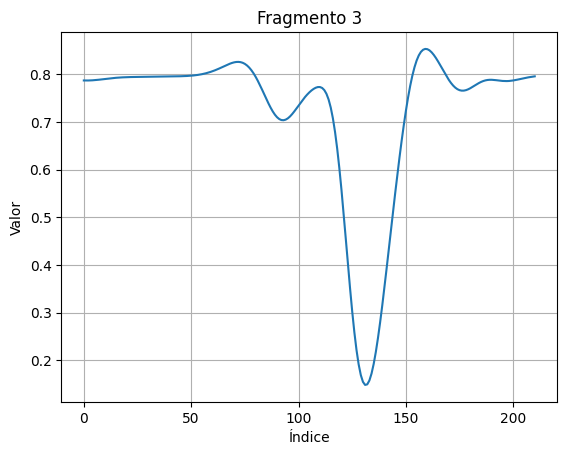

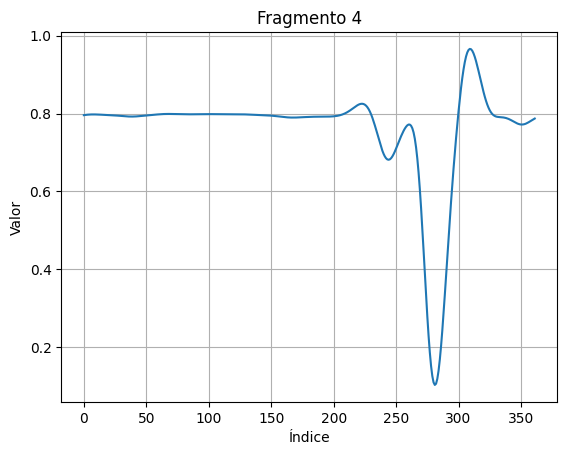

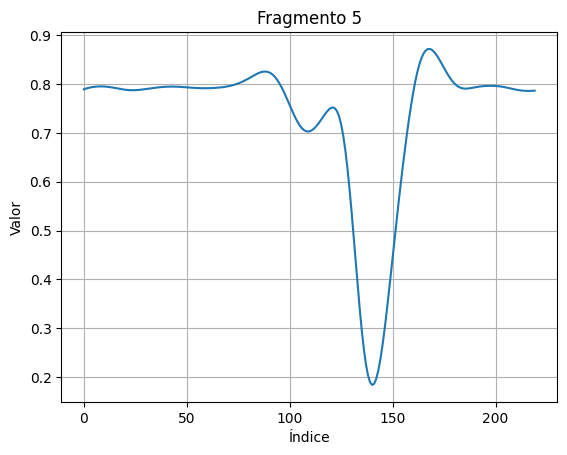

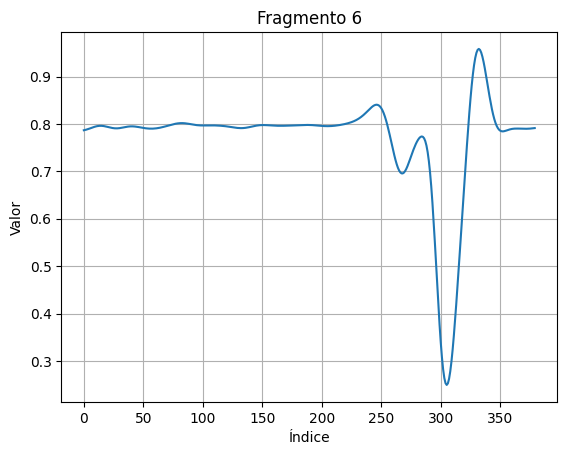

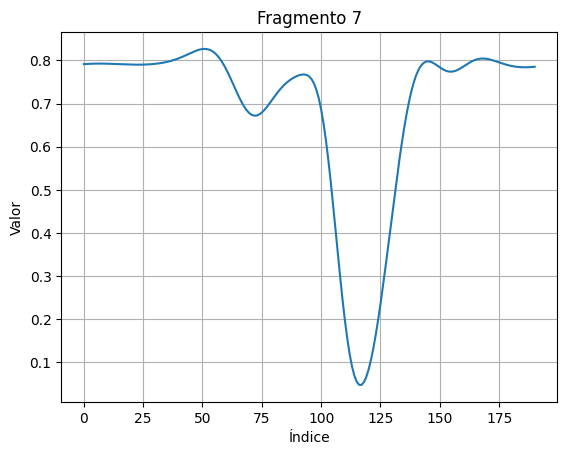

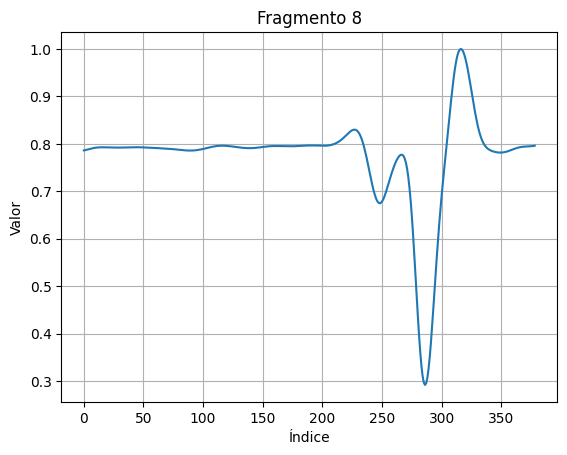

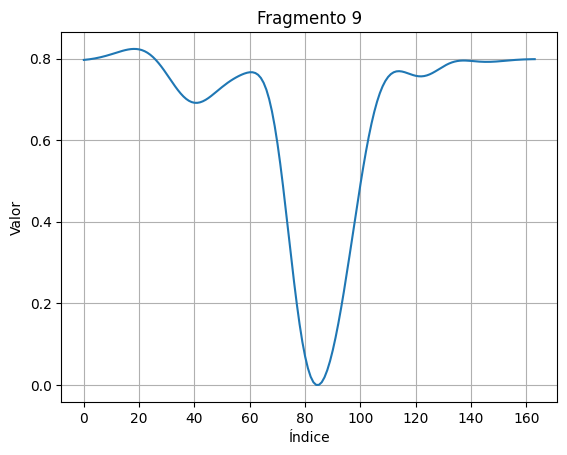

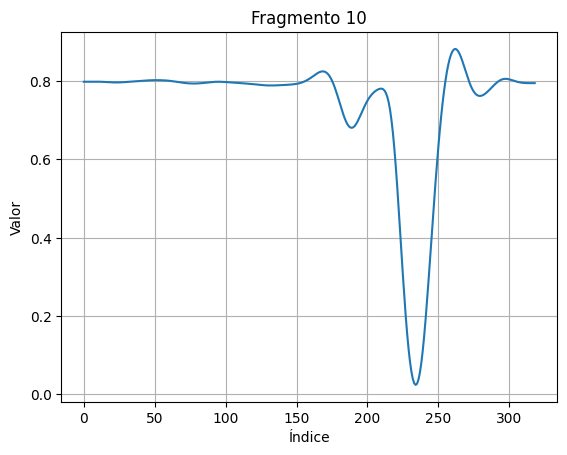

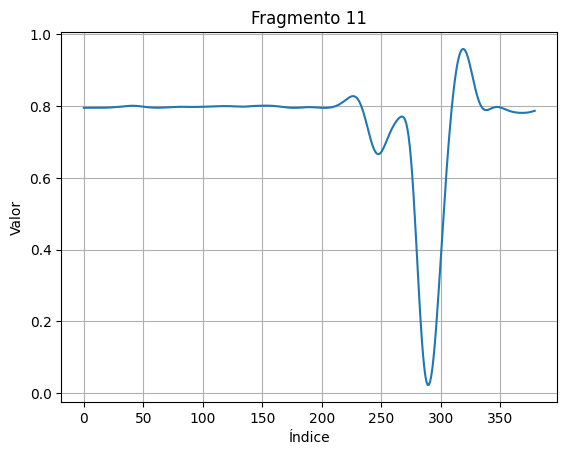

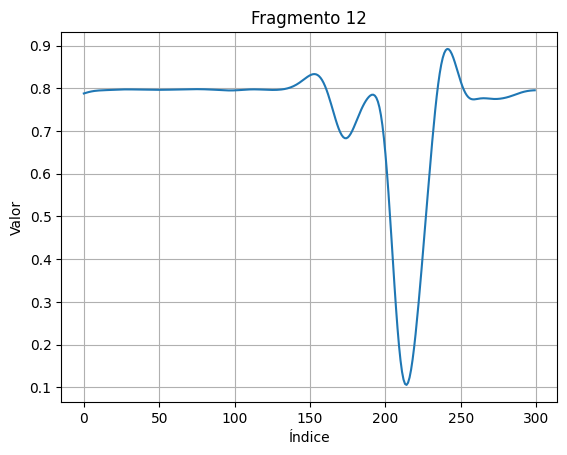

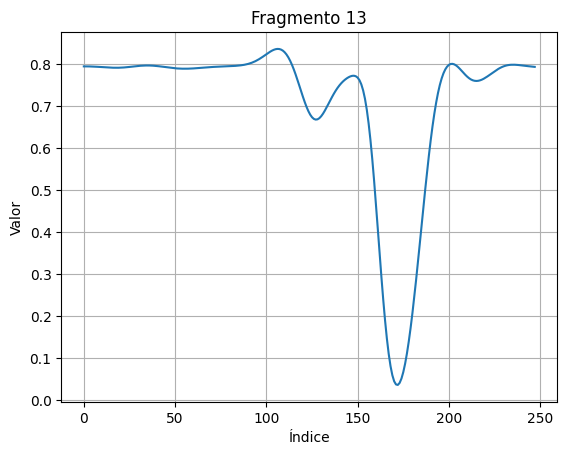

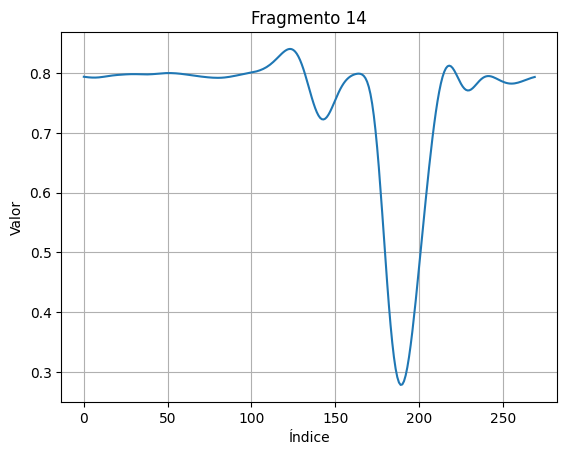

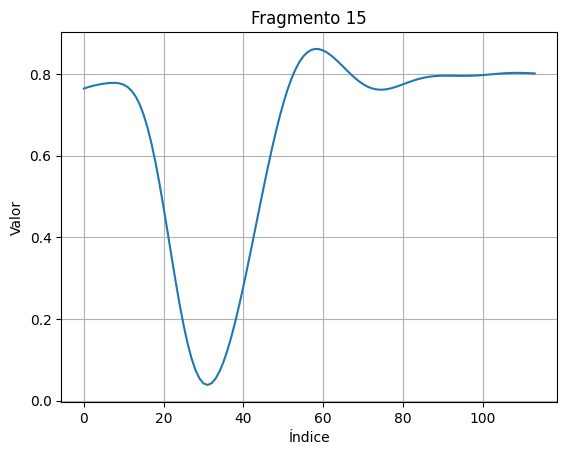

In [60]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_serve[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    


In [ ]:

# Directorio donde se guardarán los archivos CSV
directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# Si el directorio no existe, créalo
if not os.path.exists(directory):
    os.makedirs(directory)

# Itera sobre los fragmentos y guárdalos como archivos CSV
for i, fragment in enumerate(fragments):
    # Nombre del archivo CSV
    filename = os.path.join(directory, f"serve_J1_{i+1}.csv")
    
    # Abre el archivo CSV en modo escritura
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Escribe los datos del fragmento en el archivo CSV
        for row in fragment:
            writer.writerow(row)

# SMASH ACC

Media de la señal: 0.37025519324657263
Altura del pico: 0.14607650963795774
Distancia media entre picos: 152.57142857142858
Número total de golpes: 15


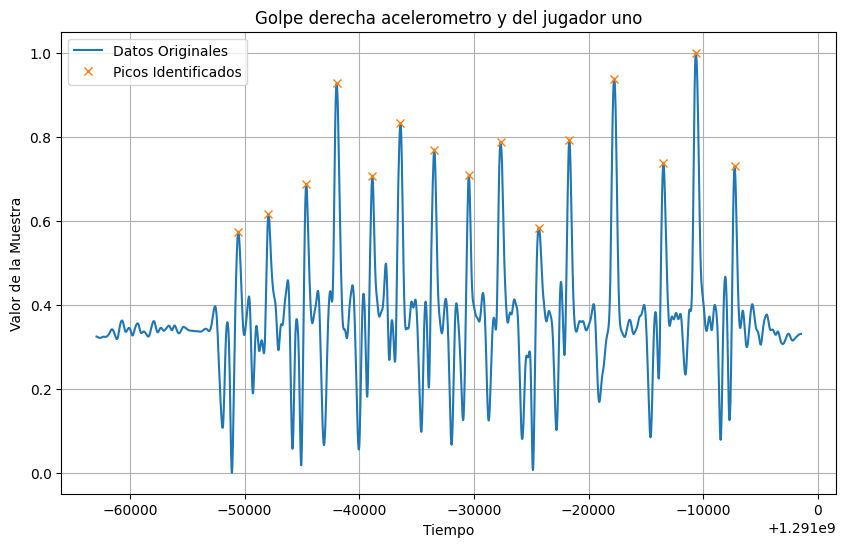

In [63]:

peaks = analyze_signal(array_smash, 'ACC_X')

Media de la señal: 0.4225155733461975
Altura del pico: 0.10773796943662836
Distancia media entre picos: 163.75
Número total de golpes: 13


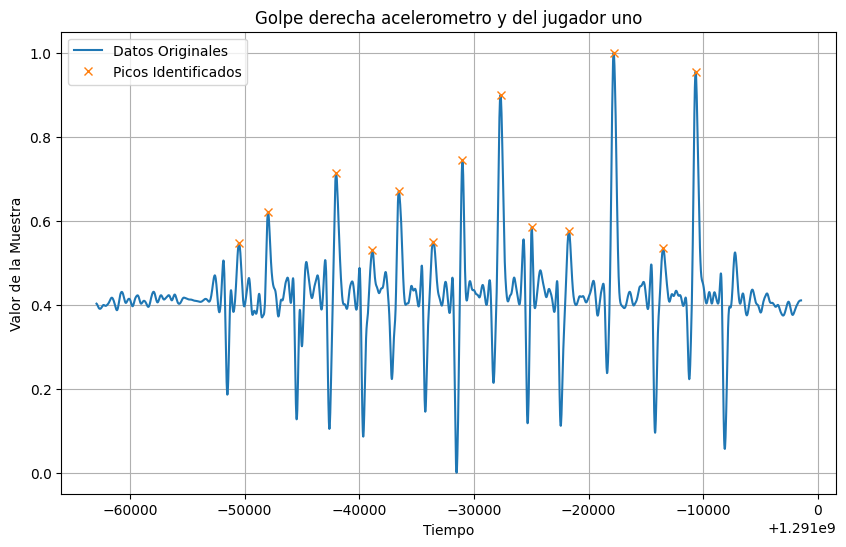

In [62]:
peaks = analyze_signal(array_smash, 'ACC_Y')

Media de la señal: 0.6231080627130491
Altura del pico: 0.1177428596300746
Distancia media entre picos: 164.69230769230768
Número total de golpes: 14


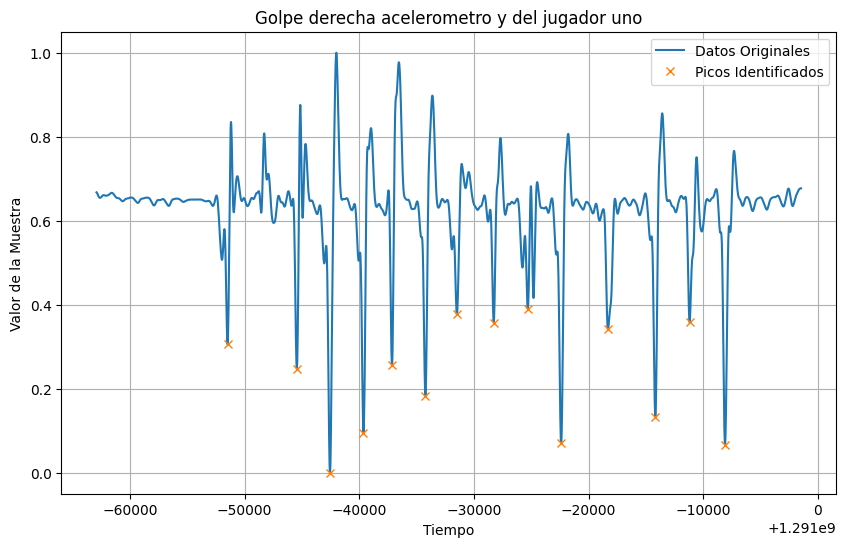

In [65]:
peaks = analyze_signal(array_smash, 'ACC_Z')

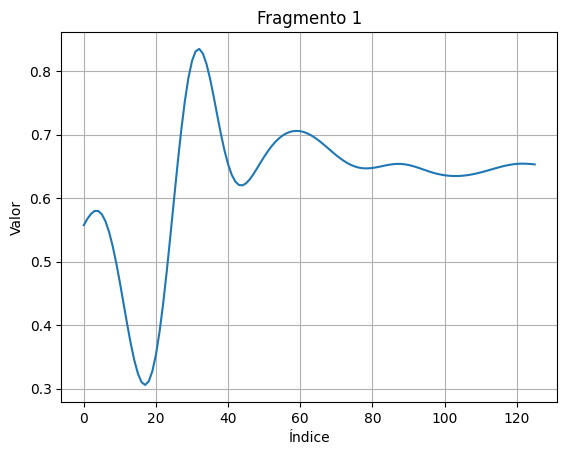

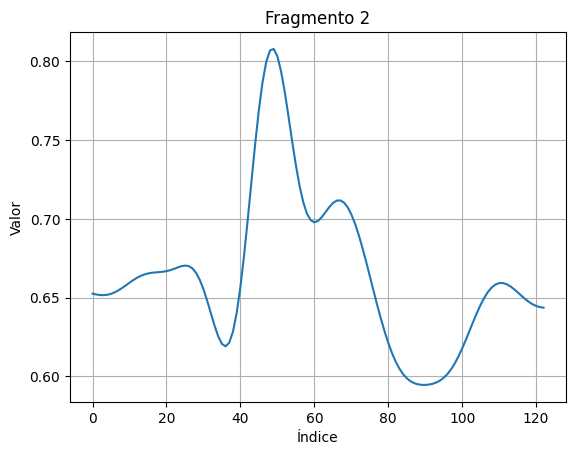

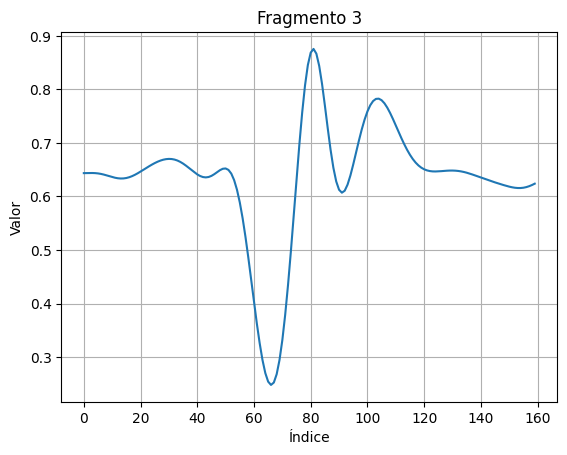

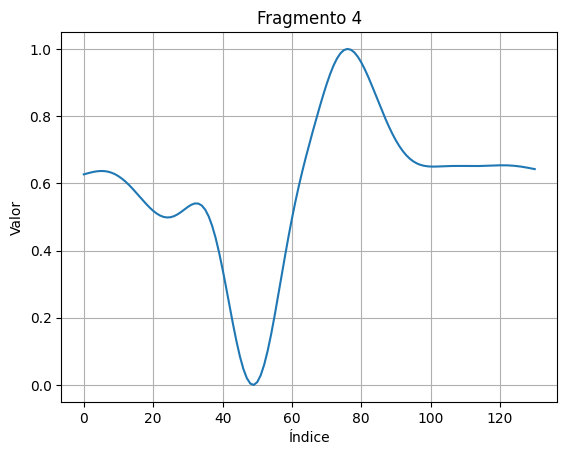

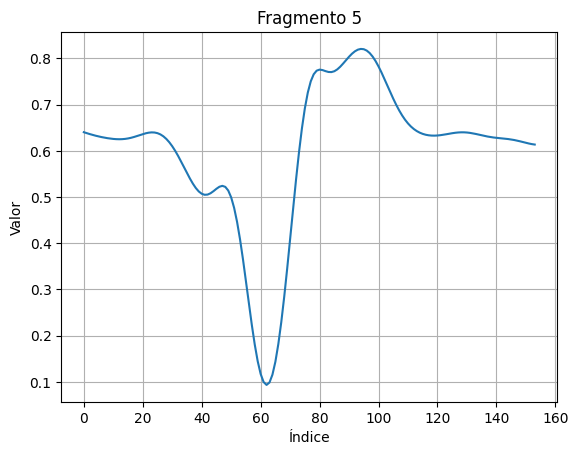

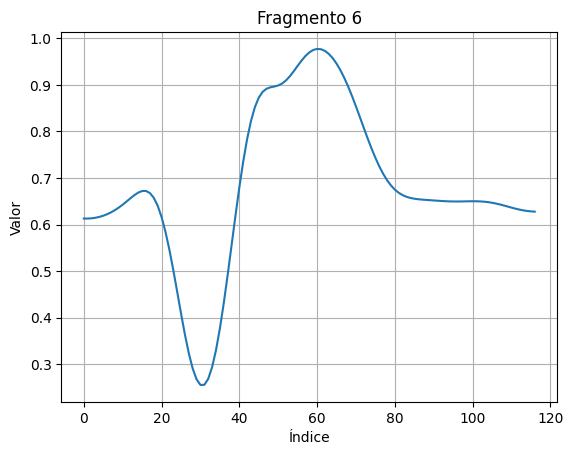

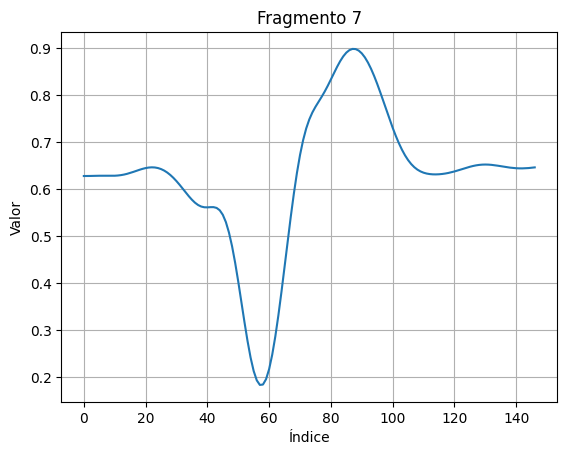

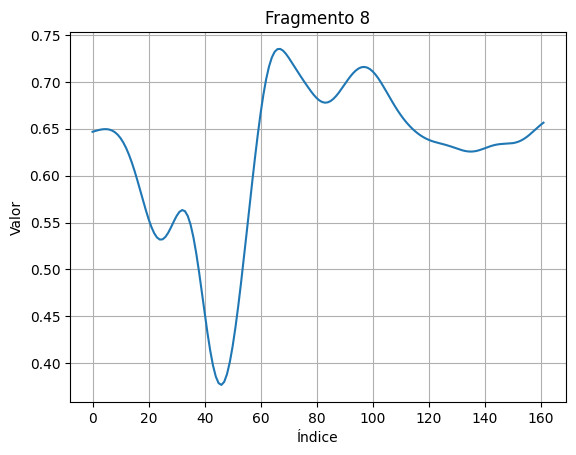

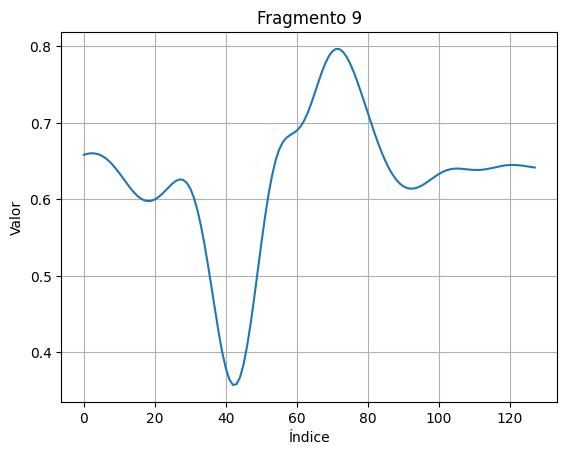

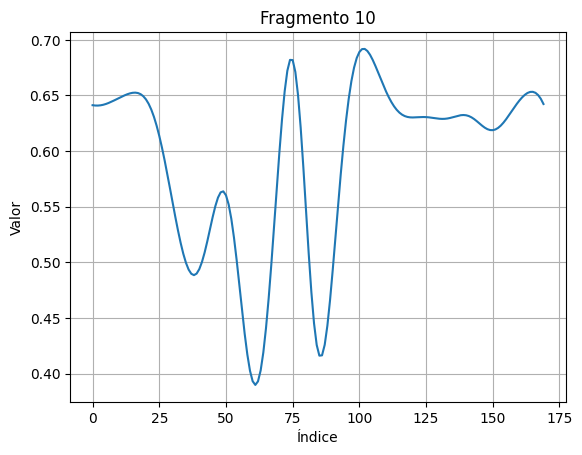

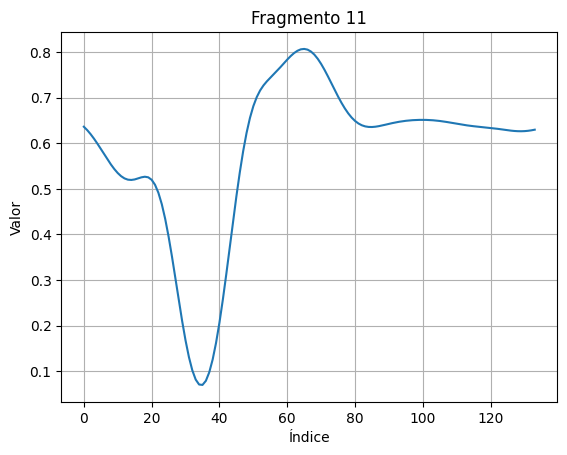

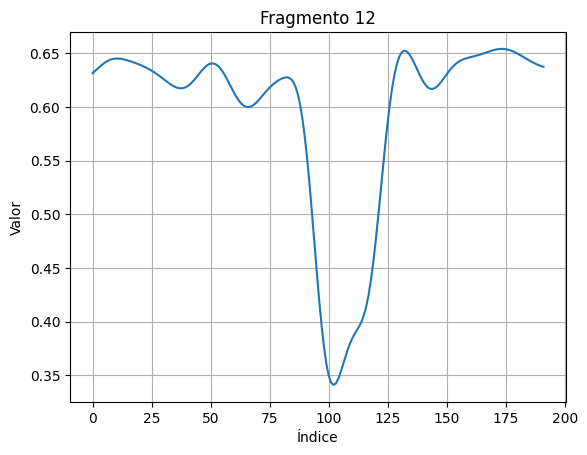

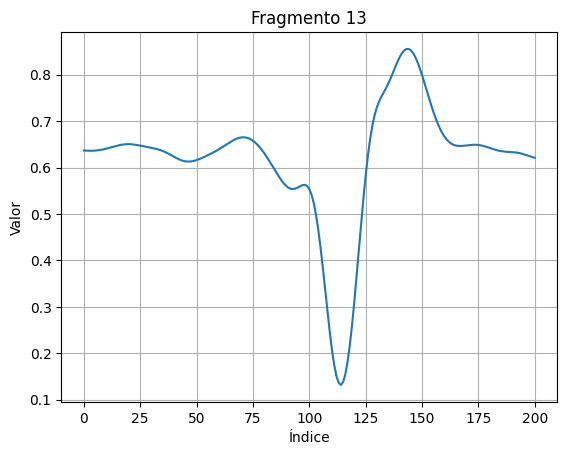

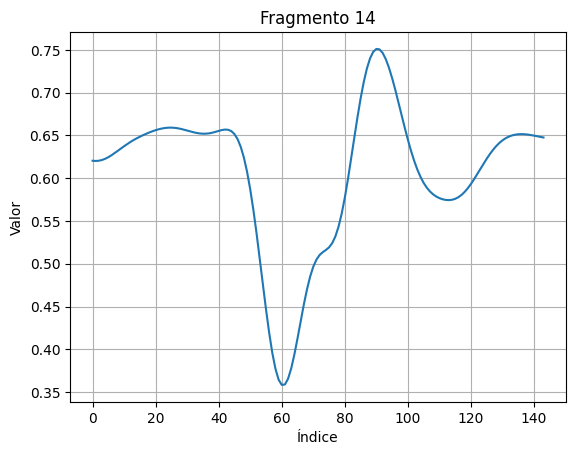

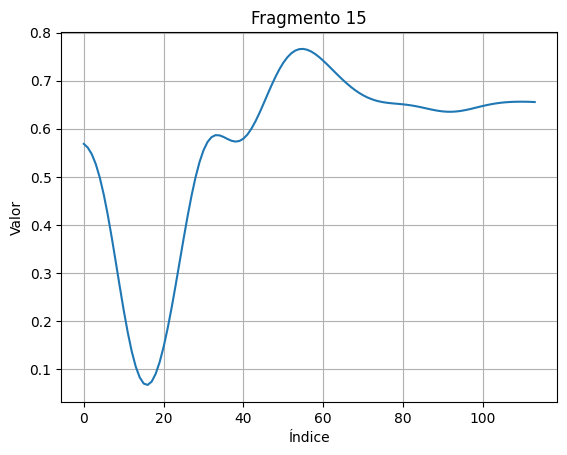

In [64]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_smash[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_Z']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    


In [ ]:

# Directorio donde se guardarán los archivos CSV
directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# Si el directorio no existe, créalo
if not os.path.exists(directory):
    os.makedirs(directory)

# Itera sobre los fragmentos y guárdalos como archivos CSV
for i, fragment in enumerate(fragments):
    # Nombre del archivo CSV
    filename = os.path.join(directory, f"smash_J1_{i+1}.csv")
    
    # Abre el archivo CSV en modo escritura
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Escribe los datos del fragmento en el archivo CSV
        for row in fragment:
            writer.writerow(row)

# VOLEA DERECHA ACC

Media de la señal: 0.6401258853984974
Altura del pico: 0.12048204806996221
Distancia media entre picos: 170.0
Número total de golpes: 14


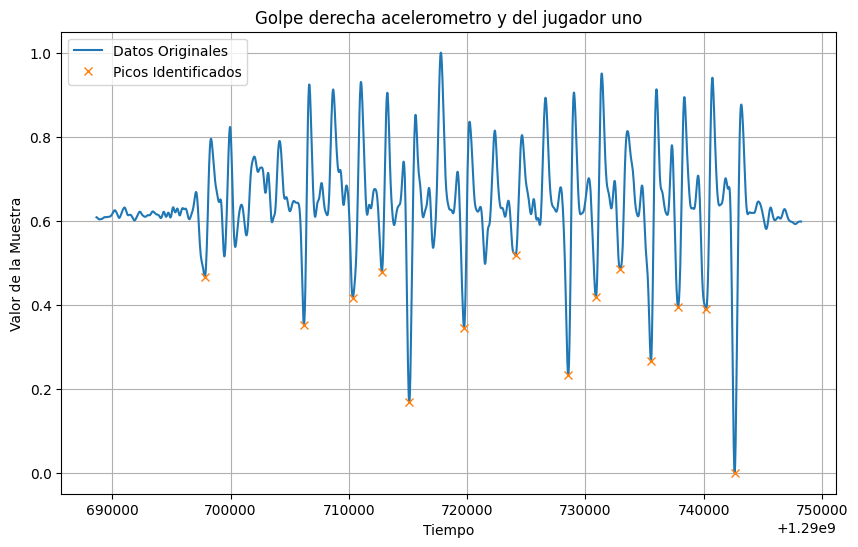

In [69]:
peaks = analyze_signal(array_vd, 'ACC_X')

Media de la señal: 0.34451334938857126
Altura del pico: 0.11274085747563278
Distancia media entre picos: 125.6470588235294
Número total de golpes: 18


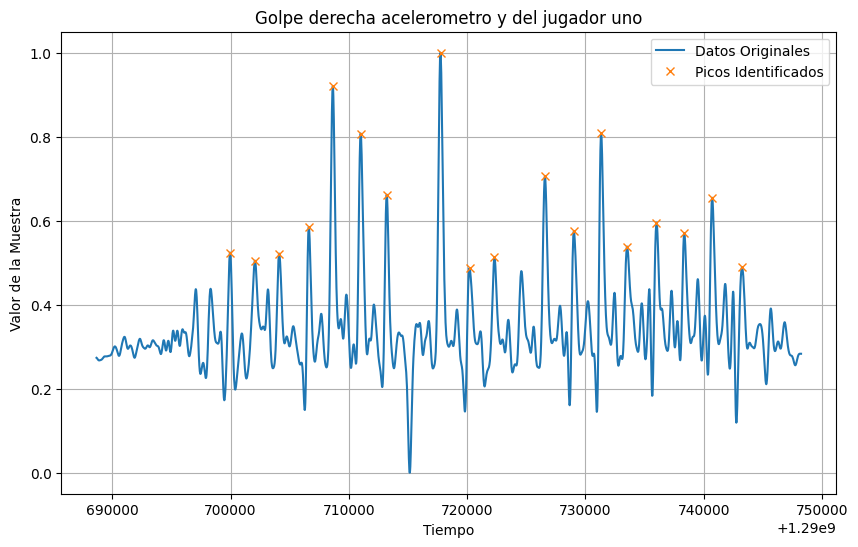

In [67]:
peaks = analyze_signal(array_vd, 'ACC_Y')

Media de la señal: 0.38163852932399833
Altura del pico: 0.11798032421121363
Distancia media entre picos: 169.46153846153845
Número total de golpes: 14


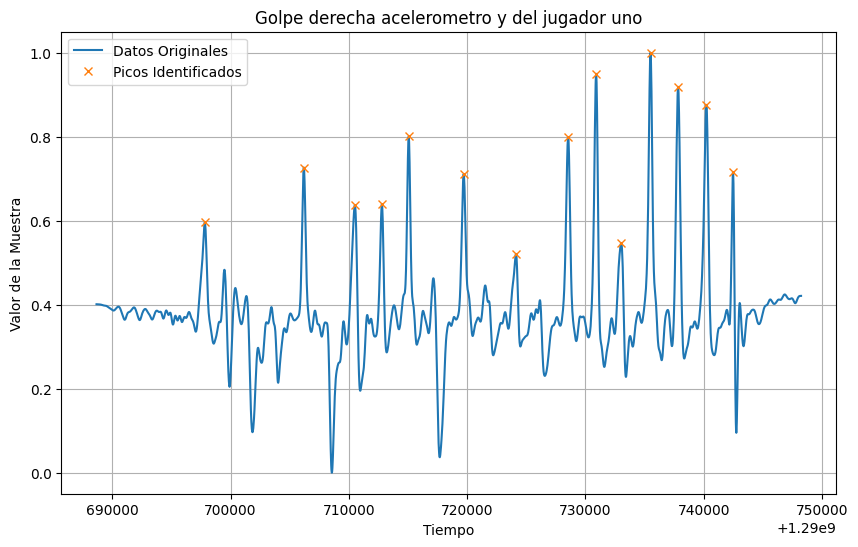

In [68]:
peaks = analyze_signal(array_vd, 'ACC_Z')

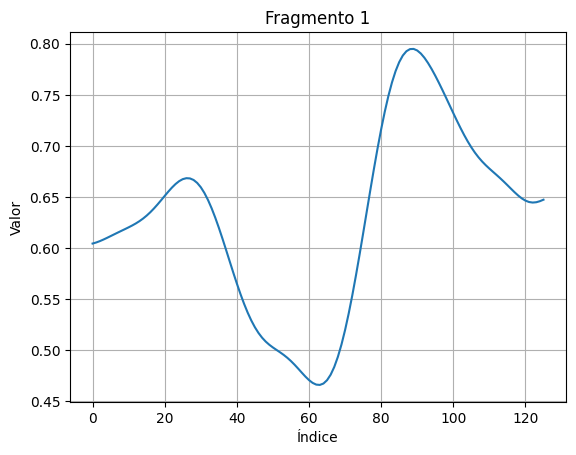

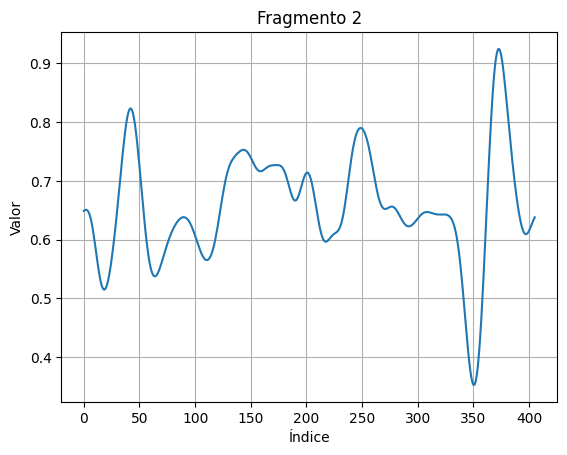

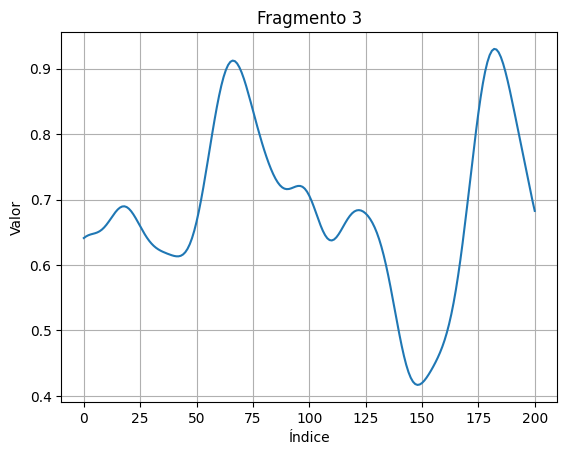

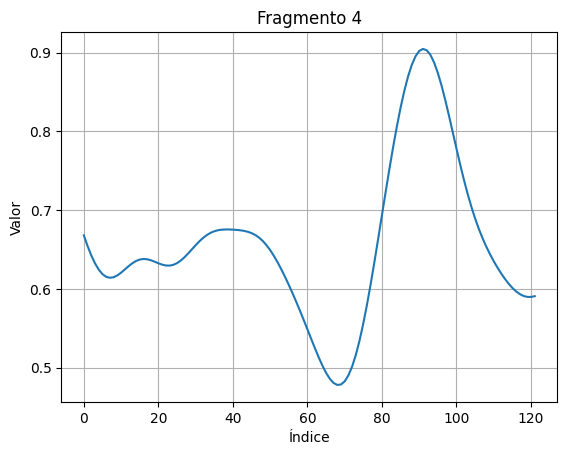

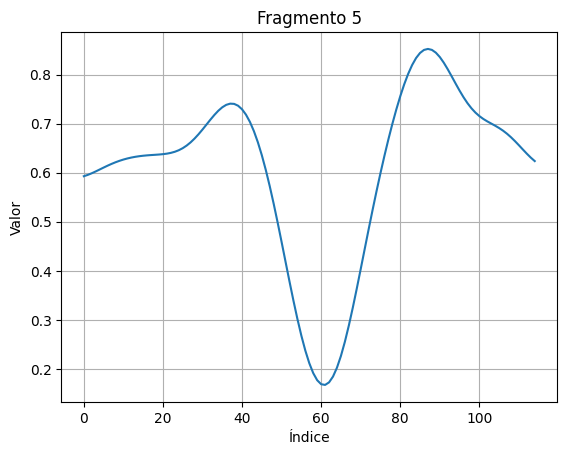

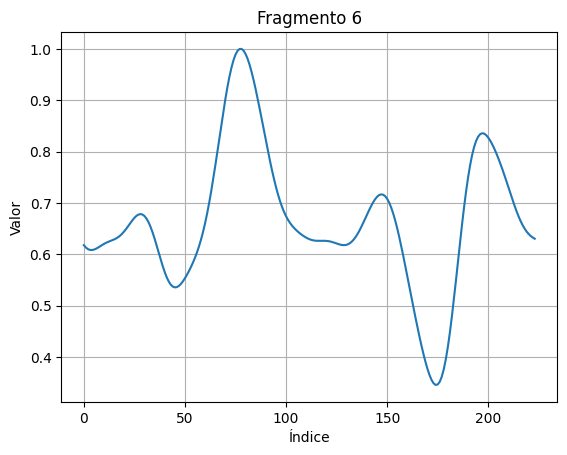

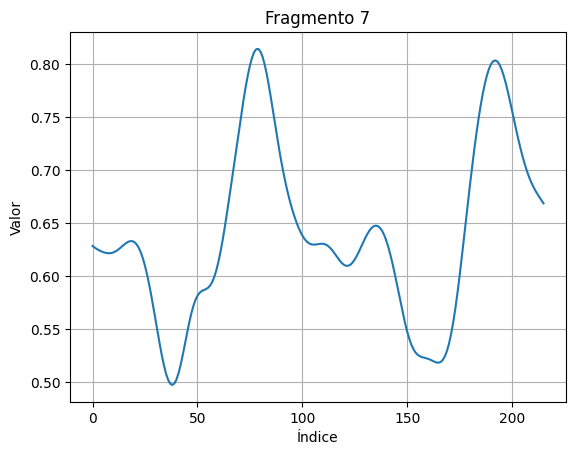

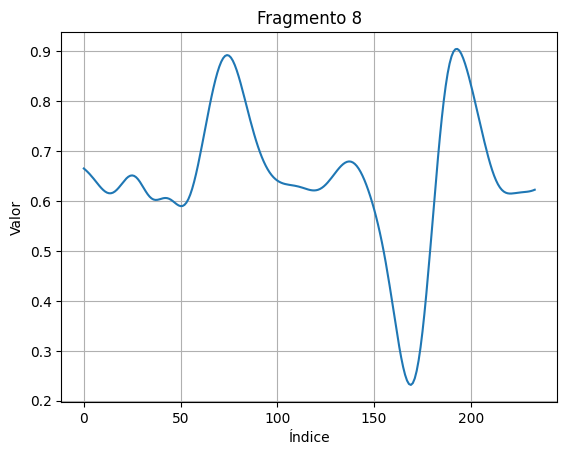

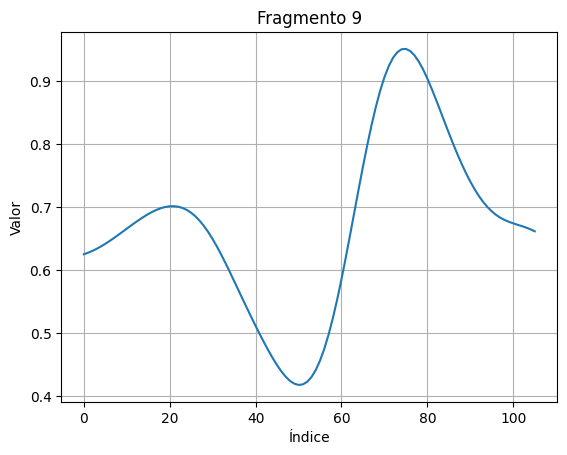

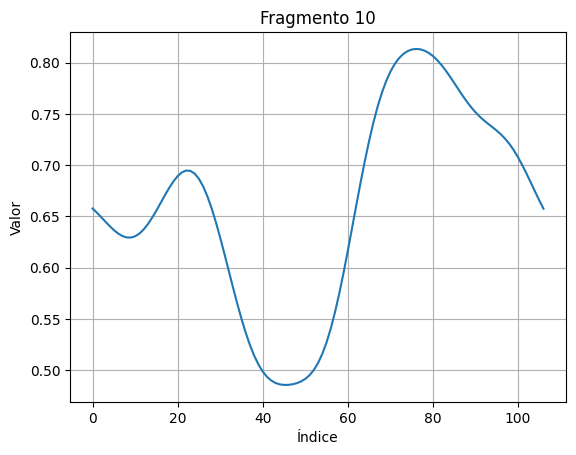

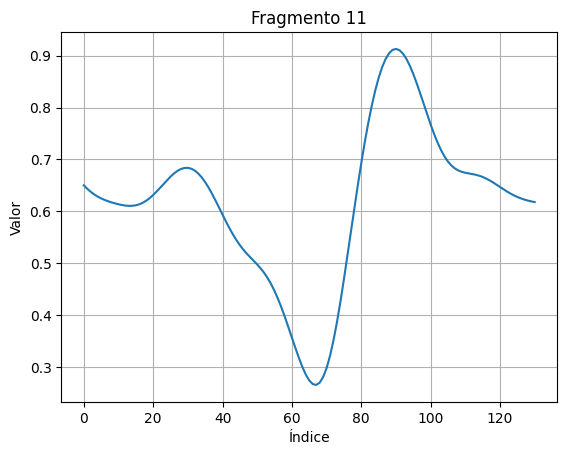

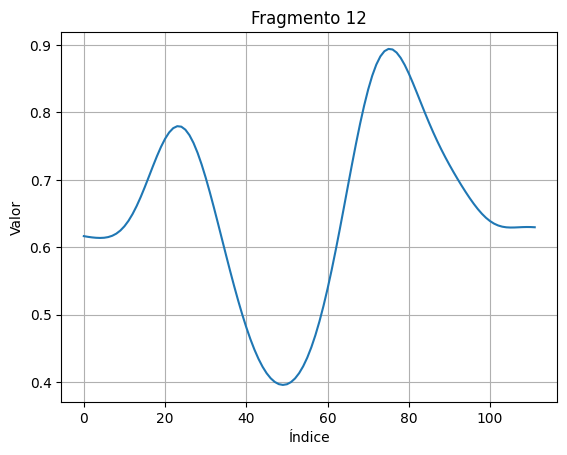

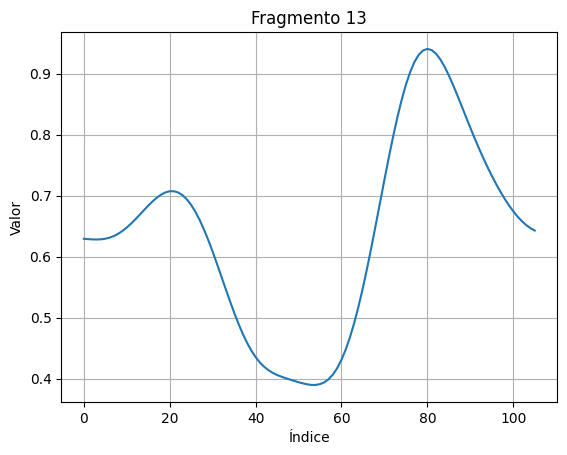

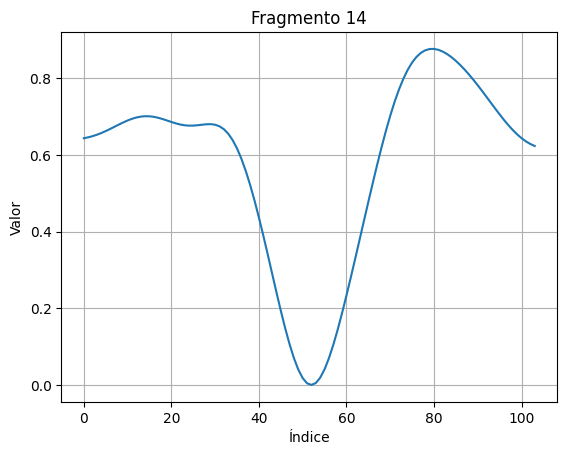

In [70]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_vd[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_X']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    

In [ ]:

    

# Directorio donde se guardarán los archivos CSV
directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# Si el directorio no existe, créalo
if not os.path.exists(directory):
    os.makedirs(directory)

# Itera sobre los fragmentos y guárdalos como archivos CSV
for i, fragment in enumerate(fragments):
    # Nombre del archivo CSV
    filename = os.path.join(directory, f"vd_J1_{i+1}.csv")
    
    # Abre el archivo CSV en modo escritura
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Escribe los datos del fragmento en el archivo CSV
        for row in fragment:
            writer.writerow(row)

# VOLEA REVES

Media de la señal: 0.553654996027815
Altura del pico: 0.09877260387300657
Distancia media entre picos: 204.5
Número total de golpes: 9


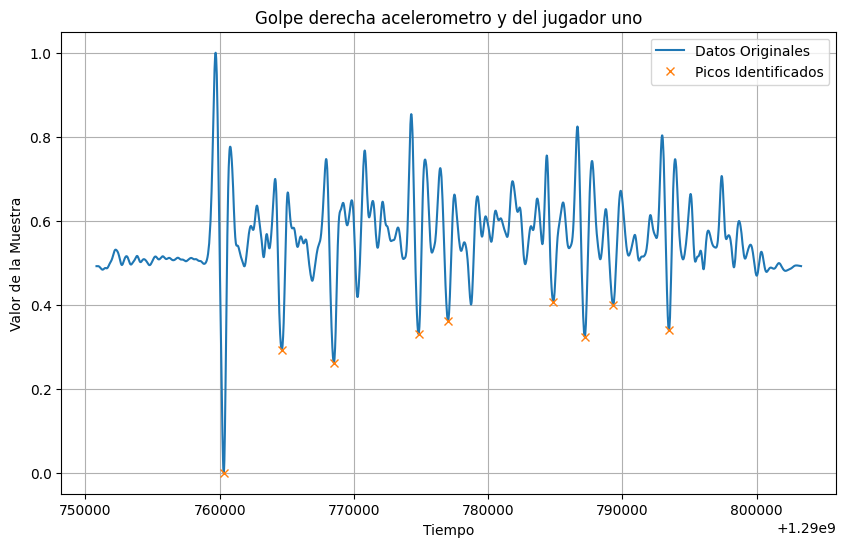

In [71]:
peaks = analyze_signal(array_vr, 'ACC_X')

Media de la señal: 0.6862873411887499
Altura del pico: 0.09108112723974615
Distancia media entre picos: 222.33333333333334
Número total de golpes: 10


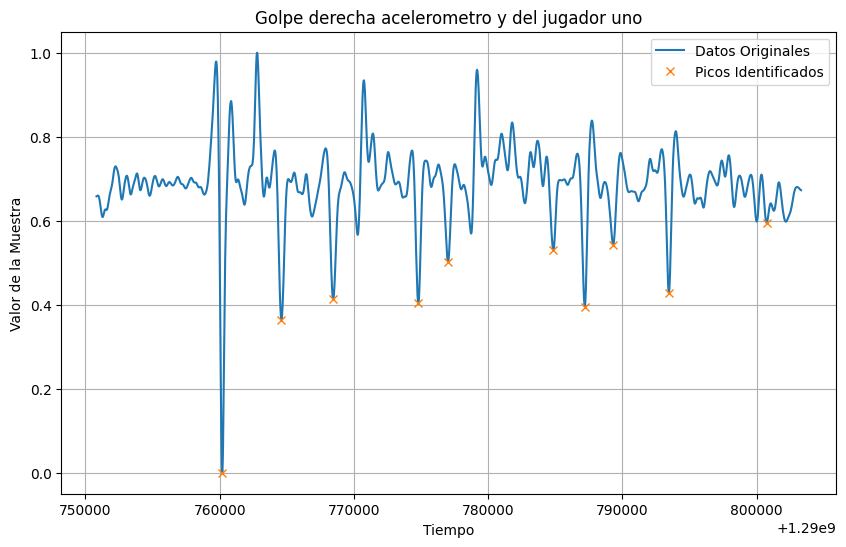

In [72]:
peaks = analyze_signal(array_vr, 'ACC_Y')

In [ ]:
peaks = analyze_signal(array_vr, 'ACC_Z')

In [ ]:
fragments = []

# Fragmentar la señal alrededor de cada pico y plotear cada fragmento
for i, peak_index in enumerate(peaks):
    print 
    if i == 0:
        start_index = peak_index - int(distances_between_peaks[i] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    elif i == len(peaks)-1:
        start_index = peak_index - int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i-1] / 2)
    else:
        start_index = peaks[i-1] + int(distances_between_peaks[i-1] / 2)
        end_index = peak_index + int(distances_between_peaks[i] / 2)
    fragment = array_vr[start_index:end_index]
    
    # Obtener la segunda columna de cada fragmento
    fragment_values = fragment['ACC_X']
    
    # Plotear el fragmento
    plt.figure()
    plt.plot(fragment_values)
    plt.title(f"Fragmento {i+1}")
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.show()
    
    fragments.append(fragment)
    
    



In [ ]:
# Directorio donde se guardarán los archivos CSV
directory = "C:/Users/Holacons/OneDrive - Vueling Airlines, S.A/Escritorio/TFM/fragmentos"

# Si el directorio no existe, créalo
if not os.path.exists(directory):
    os.makedirs(directory)

# Itera sobre los fragmentos y guárdalos como archivos CSV
for i, fragment in enumerate(fragments):
    # Nombre del archivo CSV
    filename = os.path.join(directory, f"vr_J1_{i+1}.csv")
    
    # Abre el archivo CSV en modo escritura
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        
        # Escribe los datos del fragmento en el archivo CSV
        for row in fragment:
            writer.writerow(row)